# The grapevine leaves that are (or were) not: constraints on leaf development and choosing to see what seemingly is not

___
## Load in data

The data used for analysis was previously published in a study modeling Procrustes-adjusted landmarks as a polynomial function of node position in grapevine shoots (Bryson *et al.*, 2020). The data is publicly available on the GitHub repository **[DanChitwood/grapevine_shoots](https://github.com/DanChitwood/grapevine_shoots)** as the file **Procrustes_all.csv**. The dataset contains landmark data for 8,465 grapevines leaves from *Vitis* species, *Vitis* hybrids, and *Ampelopsis glandulosa* var. *brevipedunculata*. The raw image scans of the leaves can be downloaded from Chitwood *et al.*, 2020. The 21 landmarks (42 $x$ and $y$ coordinate values for each leaf) mark the lobe tips and sinuses and the base and tip of primary and secondary veins capturing the width of vasculature for half of each leaf. A detailed visualization of the landmarks in relation to the major veins is reproduced below from Bryson *et al.*, 2020.

The columns of the dataset are named as follows:

* ***vine***: vine ID from the USDA in Geneva, NY (USA) that the leaf originates from
* ***year***: the year that the leaf was collected. Leaves were collected from shoots of each vine for the years 2013, 2015, 2016, and 2017
* ***vine_year***: vine ID and year separated by the character 'x'
* ***species***: species identity the leaf originates from.
* ***from_tip***: the node position, counting from the tip of the shoot.
* ***count***: the total number of leaves on the shoot the leaf was collected from
* ***heteroblasty***: *from_tip* divided by *count*, a normalized shoot position value
* ***bin***: the *heteroblasty* value discretized into 10 bins, from 0-1.
* ***PCs 1-42***: principal component values from a previous study, to be disregarded and removed for this work
* ***x, y 1-21***: 21 landmark coordinate values for each leaf

The inspiration and starting point for this work originated from author Joey Mullins' class project for CMSE410 taught by Dr. Arjun Krishnan at Michigan State University implementing the inverse PCA transform in Python to continuously model grapevine leaf development. The project is publicly available on the GitHub repository **[JoeyCarm/Jauxii_git](https://github.com/JoeyCarm/Jauxii_git)**.

**References**:

Bryson AE, Brown MW, Mullins J, Dong W, Bahmani K, Bornowski N, Chiu C, Engelgau P, Gettings B, Gomezcano F, Gregory LM, Haber AC, Hoh D, Jennings EE, Ji Z, Kaur P, Kenchanmane Raju SK, Long Y, Lotreck S, Mathieu DT, Ranaweera T, Ritter EJ, Sadohara R, Shrote RZ, Smith KE, Teresi SJ, Venegas J, Wang H, Wilson ML, Tarrant AR, Frank MH, Migicovsky Z, Kumar J, VanBuren R, Londo JP, Chitwood DH. (2020). Composite modeling of leaf shape laong shoots discriminates *Vitis* species better than individual leaves. *Applications in Plant Sciences*. 8(12), e11404. [doi.org/10.1002/aps3.11404](https://doi.org/10.1002/aps3.11404).

Chitwood DH, VanBuren R, Migicovsky Z, Frank M, Londo J. (2020). Data from: Latent developmental and evolutionary shapes embedded within the grapevine leaf. *Dryad*. Dataset, [doi.org/10.5061/dryad.zkh189377](https://doi.org/10.5061/dryad.zkh189377).

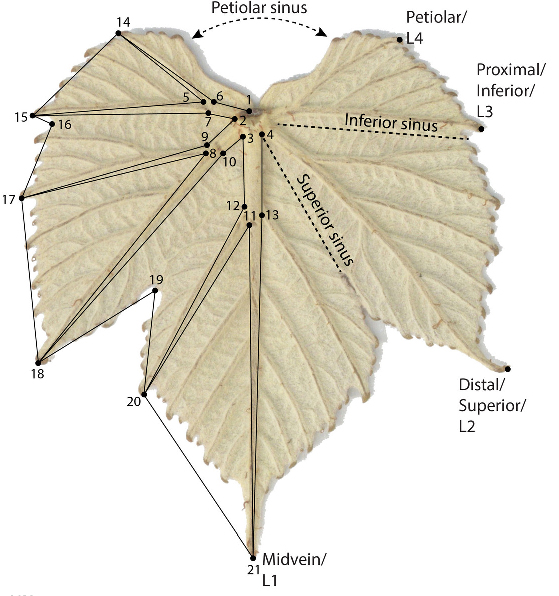

In [19]:
# Import necessary modules for analysis

# Import pandas for dataframe functionality

import pandas as pd

# Import numpy to use arrays

import numpy as np

#Import pyplot for creation of figures

import matplotlib.pyplot as plt

# Import the PCA function from scikitlearn

from sklearn.decomposition import PCA

# Import for additional visualization beyond matplotlib of dataframes

import seaborn as sns

# Import for color map generation

from itertools import cycle, islice

# Import math

import math

# See the final cell of this notebook and Figure 5 for a
# function detecting self-intersecting poloygons that is used

In [20]:
# The dataset can be read in directly from GitHub or locally

# Read in directly from GitHub

#url = 'https://raw.githubusercontent.com/DanChitwood/grapevine_shoots/master/Datasets/Procrustes_all.csv'

# Then, the .csv file must be converted into a pandas dataframe

#df = pd.read_csv(url)

# Or, read in locally

df = pd.read_csv("./Procrustes_all.csv")


In [21]:
# Check that the dataframe has been properly read in

# Print out column names

print(df.columns)

# Examine first rows of the dataframe using .head()

df.head()

Index(['vine', 'year', 'vine_year', 'species', 'from_tip', 'count',
       'heteroblasty', 'bin', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
       'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16',
       'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25',
       'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34',
       'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'x1',
       'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7',
       'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12', 'y12',
       'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17', 'y17',
       'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21'],
      dtype='object')


,vine,year,vine_year,species,from_tip,count,heteroblasty,bin,PC1,PC2,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,588538,2013,588538x2013,Ampelopsis_brevipedunculata,1,12,0.083333,0.1,1.554621,2.143733,...,-578.834190,46.491404,-1118.141437,-656.123682,122.720894,11.595190,-313.794964,-433.925710,-523.897646,-2144.553551
1,588538,2013,588538x2013,Ampelopsis_brevipedunculata,2,12,0.166667,0.2,0.433394,2.076847,...,-622.865104,152.342069,-1227.379668,-486.088487,37.248502,-35.136762,-323.681917,-534.559329,-228.933147,-2131.123376
2,588538,2013,588538x2013,Ampelopsis_brevipedunculata,3,12,0.250000,0.3,-0.940406,2.638943,...,-569.943735,262.005763,-1285.848982,-247.275946,4.639298,-14.634455,-324.229236,-744.714326,189.545700,-2050.179474
3,588538,2013,588538x2013,Ampelopsis_brevipedunculata,4,12,0.333333,0.4,0.738154,1.550260,...,-694.966401,106.153036,-1062.960387,-663.060147,63.073223,-66.465834,-342.280448,-673.325650,-482.601590,-2047.966922
4,588538,2013,588538x2013,Ampelopsis_brevipedunculata,5,12,0.416667,0.5,-0.362900,1.770673,...,-744.075968,129.358928,-1237.600027,-388.054642,-80.320243,-81.914388,-383.024994,-854.063537,-101.107333,-2004.942632


In [22]:
# Drop unnecessary columns of PCs used in the previous analysis

# Index columns to drop using range()

cols=[range(8,50)]

# Drop the columns

df.drop(df.columns[cols], axis=1, inplace=True)

# Check if columns are successfully dropped

# Print out new column names

print(df.columns)

# Examine first rows of the dataframe using .head()

df.head()

Index(['vine', 'year', 'vine_year', 'species', 'from_tip', 'count',
       'heteroblasty', 'bin', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4',
       'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10',
       'y10', 'x11', 'y11', 'x12', 'y12', 'x13', 'y13', 'x14', 'y14', 'x15',
       'y15', 'x16', 'y16', 'x17', 'y17', 'x18', 'y18', 'x19', 'y19', 'x20',
       'y20', 'x21', 'y21'],
      dtype='object')


/Users/chitwood/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,vine,year,vine_year,species,from_tip,count,heteroblasty,bin,x1,y1,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,588538,2013,588538x2013,Ampelopsis_brevipedunculata,1,12,0.083333,0.1,389.337938,309.566589,...,-578.834190,46.491404,-1118.141437,-656.123682,122.720894,11.595190,-313.794964,-433.925710,-523.897646,-2144.553551
1,588538,2013,588538x2013,Ampelopsis_brevipedunculata,2,12,0.166667,0.2,389.196938,275.817305,...,-622.865104,152.342069,-1227.379668,-486.088487,37.248502,-35.136762,-323.681917,-534.559329,-228.933147,-2131.123376
2,588538,2013,588538x2013,Ampelopsis_brevipedunculata,3,12,0.250000,0.3,349.246974,178.845523,...,-569.943735,262.005763,-1285.848982,-247.275946,4.639298,-14.634455,-324.229236,-744.714326,189.545700,-2050.179474
3,588538,2013,588538x2013,Ampelopsis_brevipedunculata,4,12,0.333333,0.4,379.366410,311.298306,...,-694.966401,106.153036,-1062.960387,-663.060147,63.073223,-66.465834,-342.280448,-673.325650,-482.601590,-2047.966922
4,588538,2013,588538x2013,Ampelopsis_brevipedunculata,5,12,0.416667,0.5,368.314814,276.931916,...,-744.075968,129.358928,-1237.600027,-388.054642,-80.320243,-81.914388,-383.024994,-854.063537,-101.107333,-2004.942632


___
## Figure 1:
### *The relationship between vein-to-blade ratio and shoot position*

The leaves in this dataset are collected from all the nodes of a single shoot, from tip to base. The largest leaves are found approximately in the middle of the shoot. At the shoot tip, leaves are smaller because they are young and still expanding. At the shoot base, leaves are mature, and leaves are smaller because of heteroblasty, developmental differences in the size and shape of sequential leaves. 

The ratio of vein-to-blade area is correlated with leaf size. We first visualize vein-to-blade ratio as a function of normalized shoot position (where the shoot tip is 0 and the base 1) to determine where to subset leaves based on their shoot position, so that changes in vein-to-blade ratio (and therefore leaf size) are only associated with leaf expansion at the shoot tip. We fit a polynomial of vein-to-blade ratio as a function of normalized shoot position to find the exact minimum vein-to-blade ratio to analyze all leaves up to the cooresponding shoot position to isolate the effects of leaf expansion.

The landmarks in this dataset are scaled and superimposed using Procrustes analysis, and therefore areas are not absolute, but because we are wroking with vein-to-blade ratio, the final result is dimensionless. Area is calculated using the shoestring algorithm.

In [23]:
# Calculate the overall area of a leaf using the shoestring algorithm
# Note: These are Procrustes coordinates, so not absolute area,
# but ultimately we are calculating a ratio of vein-to-blade area

# First, calculate the overall area of a leaf

df['all_area'] = (0.5)*abs(

(df['x4']*df['y3'] + df['x3']*df['y2'] + df['x2']*df['y1'] + df['x1']*df['y6'] + df['x6']*df['y14'] + df['x14']*df['y15'] + df['x15']*df['y16'] + df['x16']*df['y17'] + df['x17']*df['y18'] + df['x18']*df['y19'] + df['x19']*df['y20'] + df['x20']*df['y21'] + df['x21']*df['y13'] + df['x13']*df['y4']) - 

(df['y4']*df['x3'] + df['y3']*df['x2'] + df['y2']*df['x1'] + df['y1']*df['x6'] + df['y6']*df['x14'] + df['y14']*df['x15'] + df['y15']*df['x16'] + df['y16']*df['x17'] + df['y17']*df['x18'] + df['y18']*df['x19'] + df['y19']*df['x20'] + df['y20']*df['x21'] + df['y21']*df['x13'] + df['y13']*df['x4']) 

)

# Next, calculate the area of the vasculature starting with the proximal vein & branch

df['prox'] = (0.5)*abs(

(df['x2']*df['y1'] + df['x1']*df['y6'] + df['x6']*df['y14'] + df['x14']*df['y5'] + df['x5']*df['y15'] + df['x15']*df['y7'] + df['x7']*df['y2']) -

(df['y2']*df['x1'] + df['y1']*df['x6'] + df['y6']*df['x14'] + df['y14']*df['x5'] + df['y5']*df['x15'] + df['y15']*df['x7'] + df['y7']*df['x2'])

)

# Then the distal vein and branch

df['dist'] = (0.5)*abs(

(df['x3']*df['y2'] + df['x2']*df['y9'] + df['x9']*df['y17'] + df['x17']*df['y8'] + df['x8']*df['y18'] + df['x18']*df['y10'] + df['x10']*df['y3']) -

(df['y3']*df['x2'] + df['y2']*df['x9'] + df['y9']*df['x17'] + df['y17']*df['x8'] + df['y8']*df['x18'] + df['y18']*df['x10'] + df['y10']*df['x3'])

)


# And the area of the midvein and its branch

df['mid'] = (0.5)*abs(

(df['x4']*df['y3'] + df['x3']*df['y12'] + df['x12']*df['y20'] + df['x20']*df['y11'] + df['x11']*df['y21'] + df['x21']*df['y13'] + df['x13']*df['y4']) -

(df['y4']*df['x3'] + df['y3']*df['x12'] + df['y12']*df['x20'] + df['y20']*df['x11'] + df['y11']*df['x21'] + df['y21']*df['x13'] + df['y13']*df['x4'])

)

# Then calculate the overall vein area as the sum of the proximal, distal, and midveins

df['veins'] = df['prox'] + df['dist'] + df['mid']

# Calculate blade area as the overall area of the leaf minus vein area

df['blade'] = df['all_area'] - df['veins']

# Calculate vein-to-blade ratio 
# We use natural log transformation which makes the distribution more normal

df['vein_to_blade'] = np.log(df['veins'] / df['blade'])


In [24]:
# First fit a polynomial of vein-to-blade ratio modeled as a function of shoot position

coefficients = np.polyfit(df['heteroblasty'],df['vein_to_blade'],2)
func = np.poly1d(coefficients)
x_axis = np.linspace(min(df['heteroblasty']),max(df['heteroblasty']),100)
y_axis = func(x_axis)

# Create a function to solve for y given x

def solve_for_y(poly_coeffs, y):
    pc = poly_coeffs.copy()
    pc[-1] -= y
    return np.roots(pc)

# Given the minimum of the function, solve for x values

roots = solve_for_y(coefficients, min(y_axis))

# Take the average x value at the y minimum

average_node = np.mean(roots)

# Calculate percent difference of x val at minimum y relative to inverse of golden ratio

percent_diff = ( (average_node - 0.61803398875)/0.61803398875)*100

print("The minimum vein-to-blade ratio is at the relative node position", average_node)
print("The relative node position is this percent difference from the inverse of the golden ratio:",percent_diff)


The minimum vein-to-blade ratio is at the relative node position 0.6379505834434538
The relative node position is this percent difference from the inverse of the golden ratio: 3.2225727154158474


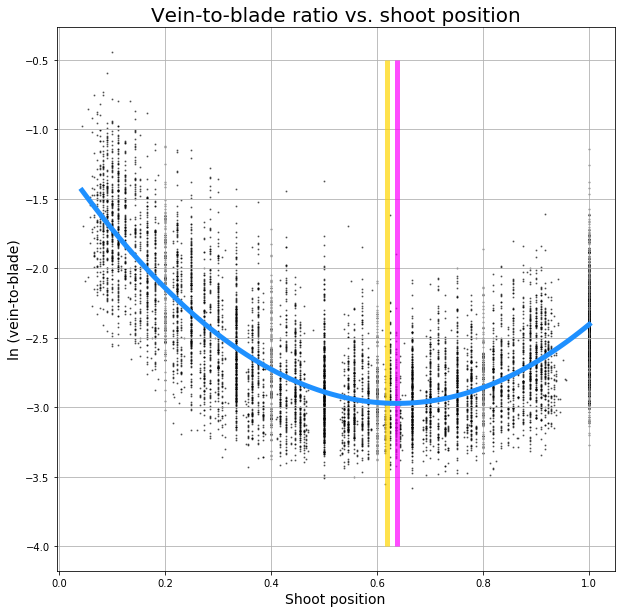

In [25]:
# visualize vein-to-blade ratio as a function of shoot position

plt.figure(figsize=(10,10))

# Show where in shoot we subset, 0.6379505834434538
plt.vlines(x=average_node, ymin=-4, ymax=-0.5, linewidth=5, alpha=0.7, color="magenta") 

# Show the inverse of the golden ratio
plt.vlines(x=0.61803398875, ymin=-4, ymax=-0.5, linewidth=5, alpha=0.7, color="gold") 

# Plot data
plt.scatter(df['heteroblasty'],df['vein_to_blade'], color="k", s=1, alpha=0.5)

# Plot modeled polynomial
plt.plot(x_axis, y_axis, color="dodgerblue", linewidth=5)

plt.xlabel('Shoot position', fontsize = 14)
plt.ylabel('ln (vein-to-blade)', fontsize = 14)
plt.title('Vein-to-blade ratio vs. shoot position', fontsize = 20)
plt.grid()

plt.savefig("./Figure_images/Figure1.jpg")

The local minimum is calculated at 0.6379505834434538 relative shoot position, close to the inverse value of the golden ratio. We will take all leaves with relative shoot positions $<=$ 0.6379505834434538 for further analysis.

__________
## Figure 2
### *Modeling leaf shape as a function of vein-to-blade ratio*

Unlike relative shoot position, vein-to-blade ratio is continuous and reflects leaf development and expansion. By using dimension reduction (Principal Component Analysis, PCA) we will model shape changes as a function of vein-to-blade ratio. The modeled development changes in shape can be projected back onto the PCA to examine species differences in leaf development in the context of the empricial shape data.

In [26]:
# As described above, we only analyze leaves <= 0.6379505834434538 relative shoot position

tip = df[df['heteroblasty']<=0.6379505834434538]

# In order to perform PCA, the data must be converted into a numpy array

raw_data = pd.DataFrame(tip).to_numpy()

# Remove extra data to perform PCA only on landmark data

raw_data_clean = np.delete(raw_data,[range(0,7)],1)

# Do a preliminary PCA to see how many PCs we need and the variance explained by each
# Note: we do not scale the data, as the coordinates are Procrustes-adjusted,
# which scales and superimposes landmarks

test_pca = PCA(n_components=42)

test_PCs = test_pca.fit_transform(raw_data_clean)

print(test_pca.explained_variance_ratio_)

print(test_pca.explained_variance_ratio_.cumsum())


[9.01895895e-01 9.63979031e-02 1.28876824e-03 4.15454110e-04
 5.62854225e-07 3.24711222e-07 1.94260366e-07 1.53083962e-07
 1.23398379e-07 1.21003268e-07 8.55467071e-08 7.22631510e-08
 6.26944988e-08 5.16204200e-08 4.01218795e-08 3.56014034e-08
 3.05210934e-08 2.40935524e-08 1.93382521e-08 1.63003954e-08
 1.37767670e-08 1.19583016e-08 1.14355450e-08 6.87077811e-09
 5.93466441e-09 3.75839330e-09 2.33804793e-09 1.81382560e-09
 8.26668500e-10 7.38342274e-10 6.00621794e-10 4.59773731e-10
 3.84340119e-10 3.46112917e-10 3.05647167e-10 2.69004671e-10
 2.30690579e-10 1.79626555e-10 1.23696581e-10 8.58295973e-11
 7.84877370e-11 4.54594100e-11]
[0.90189589 0.9982938  0.99958257 0.99999802 0.99999858 0.99999891
 0.9999991  0.99999925 0.99999938 0.9999995  0.99999958 0.99999966
 0.99999972 0.99999977 0.99999981 0.99999985 0.99999988 0.9999999
 0.99999992 0.99999994 0.99999995 0.99999996 0.99999997 0.99999998
 0.99999999 0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.       

PC1 and PC2 explain 99.82938% of all variance (90.2% and 9.6%, respectively). Using only these two PCs simplifies analysis and explains the vast majority of shape variance.

In [27]:
# Define the PCA function below, using two components (PC1 and PC2)

pca = PCA(n_components=2)

# Now apply the sklearn pca function with two components to the dataset

PCs = pca.fit_transform(raw_data_clean)

# The inverse transform function is applied

inverse_PCA = pca.inverse_transform(PCs)

# Add PCs to the existing dataframe called "data_PCs"

PCs_df = pd.DataFrame(PCs)

PCs_df.columns = ['PC1','PC2']

data_PCs = pd.concat([tip.reset_index(drop=True), PCs_df.reset_index(drop=True)], axis=1)

# Check that formatting is OK

data_PCs.head()

,vine,year,vine_year,species,from_tip,count,heteroblasty,bin,x1,y1,...,y21,all_area,prox,dist,mid,veins,blade,vein_to_blade,PC1,PC2
0,588538,2013,588538x2013,Ampelopsis_brevipedunculata,1,12,0.083333,0.1,389.337938,309.566589,...,-2144.553551,1.089525e+06,32991.422520,50824.845844,82225.353135,166041.621500,9.234830e+05,-1.715914,1.103641e+06,-205451.176097
1,588538,2013,588538x2013,Ampelopsis_brevipedunculata,2,12,0.166667,0.2,389.196938,275.817305,...,-2131.123376,1.302910e+06,27242.299211,44976.198123,64794.243328,137012.740663,1.165898e+06,-2.141173,7.795890e+05,-183180.197911
2,588538,2013,588538x2013,Ampelopsis_brevipedunculata,3,12,0.250000,0.3,349.246974,178.845523,...,-2050.179474,1.152775e+06,20052.677769,32910.631456,50738.043789,103701.353014,1.049074e+06,-2.314148,9.562191e+05,-263705.204568
3,588538,2013,588538x2013,Ampelopsis_brevipedunculata,4,12,0.333333,0.4,379.366410,311.298306,...,-2047.966922,1.371555e+06,15891.061080,33960.897308,68980.887578,118832.845967,1.252722e+06,-2.355357,6.676254e+05,-183628.684284
4,588538,2013,588538x2013,Ampelopsis_brevipedunculata,5,12,0.416667,0.5,368.314814,276.931916,...,-2004.942632,1.430464e+06,14110.443996,26699.220683,48704.184429,89513.849108,1.340950e+06,-2.706740,5.575116e+05,-204408.198419


In [28]:
# Create a continuous model of leaf development for each species
# as a function of vein-to-blade ratio

# Create a species list for indexing purposes

species_list = ["Vitis_riparia","Vitis_labrusca","Vitis_rupestris","Vitis_cinerea",
                "Vitis_acerifolia","Vitis_amurensis","Vitis_vulpina","Vitis_aestivalis",
                "Vitis_palmata","Vitis_coignetiae","Ampelopsis_brevipedunculata"]

# Create empty lists to store...

species = [] # species identity
model_PC1 = [] # the modeled PC1 value
model_PC2 = [] # the modeled PC2 value
model_vtb = [] # the vein-to-blade ratio

# Create a for loop to create models for each species

for i in species_list:
    
    species.append(i) # record species
    
    spe = data_PCs[data_PCs['species']==i] # use masking to get data for each species
    
    # create polynomial models for PC values versus vein-to-blade
    
    coefficients1 = np.polyfit(spe['vein_to_blade'],spe['PC1'],2)
    func1 = np.poly1d(coefficients1)
    x_axis1 = np.linspace(min(spe['vein_to_blade']),max(spe['vein_to_blade']),100)
    y_axis1 = func1(x_axis1)
    model_PC1.append(y_axis1)
    
    coefficients2 = np.polyfit(spe['vein_to_blade'],spe['PC2'],2)
    func2 = np.poly1d(coefficients2)
    x_axis2 = np.linspace(min(spe['vein_to_blade']),max(spe['vein_to_blade']),100)
    y_axis2 = func2(x_axis2)
    model_PC2.append(y_axis2)
    
    model_vtb.append(x_axis2)

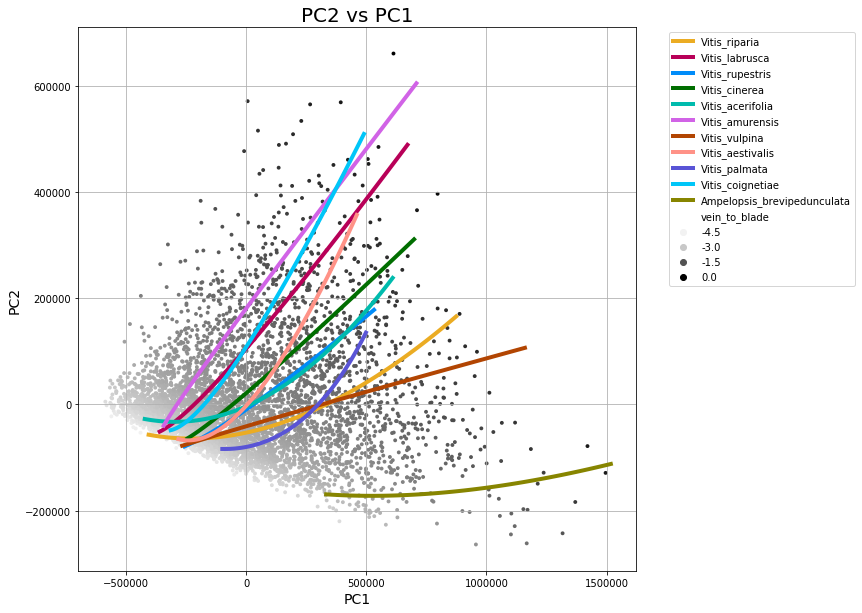

In [29]:
# Plot PC1 and PC2 values, color by vein-to-blade ratio

# Colors from http://tsitsul.in/blog/coloropt/ for optimal color perception for 12 colors

color_list = ["#ebac23","#b80058","#008cf9","#006e00","#00bbad","#d163e6","#b24502","#ff9287","#5954d6","#00c6f8","#878500","#00a76c"] 

plt.figure(figsize=(10,10))

for i in range(11):

    plt.plot(model_PC1[i], model_PC2[i], label=species_list[i], color=color_list[i], linewidth=4)

sns.scatterplot(data=data_PCs, x='PC1',y='PC2', color="k", hue="vein_to_blade", s=15, linewidth=0, palette=sns.light_palette("black", as_cmap=True))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')  
plt.title('PC2 vs PC1', fontsize = 20)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.grid()
plt.savefig("./Figure_images/Figure2D.jpg")
plt.show()



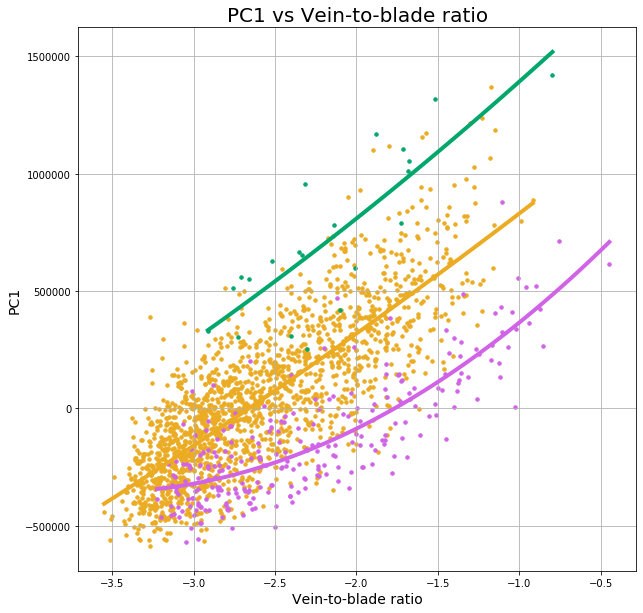

In [30]:
# visualize vein-to-blade ratio as a function of PC1 values
# Note: for some reason the hexcode for Ampelopsis_brevipedunculata doesn't correspond with the last graph

rip = data_PCs[data_PCs['species']=="Vitis_riparia"]
amp = data_PCs[data_PCs['species']=="Ampelopsis_brevipedunculata"]
amu = data_PCs[data_PCs['species']=="Vitis_amurensis"]

plt.figure(figsize=(10,10))

plt.scatter(rip['vein_to_blade'],rip['PC1'], color="#ebac23", s=12, alpha=1)
plt.scatter(amp['vein_to_blade'],amp['PC1'], color="#00a76c", s=12, alpha=1)
plt.scatter(amu['vein_to_blade'],amu['PC1'], color="#d163e6", s=12, alpha=1)

plt.plot(model_vtb[0], model_PC1[0], color="#ebac23", linewidth=4)
plt.plot(model_vtb[5], model_PC1[5], color="#d163e6", linewidth=4)
plt.plot(model_vtb[10], model_PC1[10], color="#00a76c", linewidth=4)

plt.xlabel('Vein-to-blade ratio', fontsize = 14)
plt.ylabel('PC1', fontsize = 14)
plt.title('PC1 vs Vein-to-blade ratio', fontsize = 20)
plt.grid()
plt.savefig("./Figure_images/Figure2A.jpg")

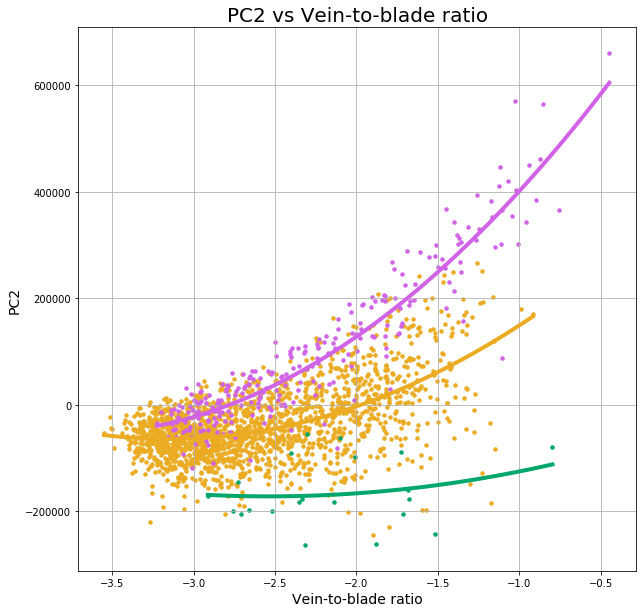

In [31]:
# Visualize vein-to-blade ratio as a function of PC2 values

rip = data_PCs[data_PCs['species']=="Vitis_riparia"]
amp = data_PCs[data_PCs['species']=="Ampelopsis_brevipedunculata"]
amu = data_PCs[data_PCs['species']=="Vitis_amurensis"]

plt.figure(figsize=(10,10))

plt.scatter(rip['vein_to_blade'],rip['PC2'], color="#ebac23", s=12, alpha=1)
plt.scatter(amp['vein_to_blade'],amp['PC2'], color="#00a76c", s=12, alpha=1)
plt.scatter(amu['vein_to_blade'],amu['PC2'], color="#d163e6", s=12, alpha=1)

plt.plot(model_vtb[0], model_PC2[0], color="#ebac23", linewidth=4)
plt.plot(model_vtb[5], model_PC2[5], color="#d163e6", linewidth=4)
plt.plot(model_vtb[10], model_PC2[10], color="#00a76c", linewidth=4)

plt.xlabel('Vein-to-blade ratio', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.title('PC2 vs Vein-to-blade ratio', fontsize = 20)
plt.grid()
plt.savefig("./Figure_images/Figure2B.jpg")


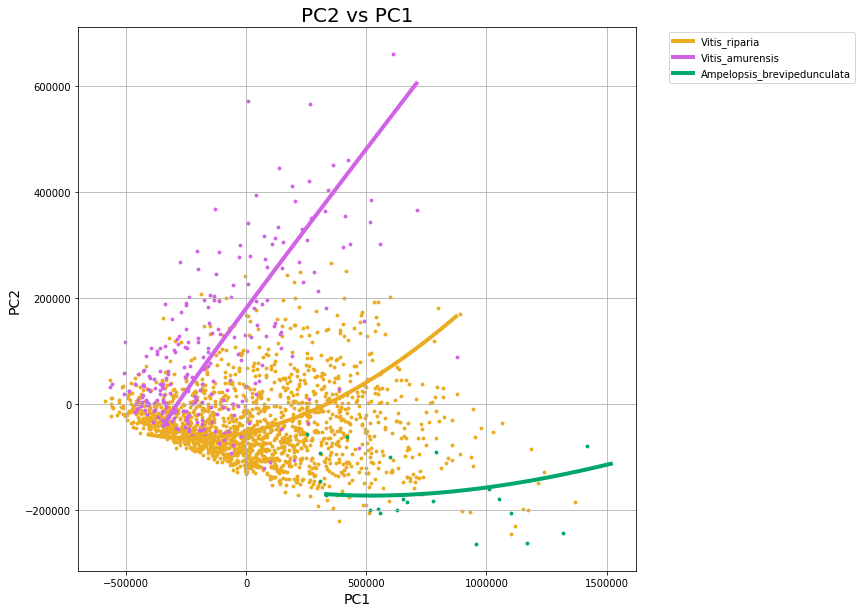

In [32]:
# Visualize models in the original PCA space

# Plot PC1 and PC2 values, color by the three example species

# Create masks of species for pandas dataframe

rip = data_PCs[data_PCs['species']=="Vitis_riparia"]
amp = data_PCs[data_PCs['species']=="Ampelopsis_brevipedunculata"]
amu = data_PCs[data_PCs['species']=="Vitis_amurensis"]

# Colors from http://tsitsul.in/blog/coloropt/ for optimal color perception for 12 colors

color_list = ["#ebac23","gray","gray","gray","gray","#d163e6","gray","gray","gray","gray","#00a76c"] 

plt.figure(figsize=(10,10))

# Plot models

plt.plot(model_PC1[0], model_PC2[0], label=species_list[0], color=color_list[0], linewidth=4)
plt.plot(model_PC1[5], model_PC2[5], label=species_list[5], color=color_list[5], linewidth=4)
plt.plot(model_PC1[10], model_PC2[10], label=species_list[10], color=color_list[10], linewidth=4)

# Plot data

sns.scatterplot(data=rip, x='PC1',y='PC2', color="#ebac23", s=15, linewidth=0)
sns.scatterplot(data=amu, x='PC1',y='PC2', color="#d163e6", s=15, linewidth=0)
sns.scatterplot(data=amp, x='PC1',y='PC2', color="#00a76c", s=15, linewidth=0)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')  
plt.title('PC2 vs PC1', fontsize = 20)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.grid()
plt.savefig("./Figure_images/Figure2C.jpg")
plt.show()

__________
## Figure 3
### *Allometric changes in leaf shape during development*

To understand the modeled development of leaves in species, the relative proportions of area in different parts of the leaf will be visualized. As leaf shape is modeled as a function of vein-to-blade ratio, which in turn is an indicator of leaf size, the changes in relative proportions of leaf area are allometric. Using the inverse PCA function, leaf shapes at intervals along the modeled developmental trajectory will be calculated to create a time lapse.

In [33]:
# Create a function `proportions` which calculates the relative proportion
# of different areas of leaves across development for the chosen species

# The function relies on the model_PC1 and model_PC2 values created above

# For the chosen species, the function creates the inverse transform,
# calculates proportion occupied by each area, and returns
# proportions across development using the index i

def proportions(chosen_species, i):

    v = species.index(chosen_species)

    #Create one array of PC1 and PC2 values for the species
    pca_array = np.column_stack((model_PC1[v], model_PC2[v]))

    # Apply the inverse transform function to the newly generated array to come up with a list of hypothetical leaf
    # shape data along the model of development
    inv_new = pca.inverse_transform(pca_array)
    
    # Set index values to landmark names making it easier to calculate shoestring algorithm below
    # Note: landmarks start at index position 1 through 42
    x1=1 
    y1=2
    x2=3
    y2=4
    x3=5
    y3=6
    x4=7
    y4=8
    x5=9
    y5=10
    x6=11
    y6=12
    x7=13
    y7=14
    x8=15
    y8=16
    x9=17
    y9=18
    x10=19
    y10=20
    x11=21
    y11=22
    x12=23
    y12=24
    x13=25
    y13=26
    x14=27
    y14=28
    x15=29
    y15=30
    x16=31
    y16=32
    x17=33
    y17=34
    x18=35
    y18=36
    x19=37
    y19=38
    x20=39
    y20=40
    x21=41
    y21=42

    # all area

    all_area = (0.5)*abs(

    (inv_new[i,x4]*inv_new[i,y3] + inv_new[i,x3]*inv_new[i,y2] + inv_new[i,x2]*inv_new[i,y1] + inv_new[i,x1]*inv_new[i,y6] + inv_new[i,x6]*inv_new[i,y14] + inv_new[i,x14]*inv_new[i,y15] + inv_new[i,x15]*inv_new[i,y16] + inv_new[i,x16]*inv_new[i,y17] + inv_new[i,x17]*inv_new[i,y18] + inv_new[i,x18]*inv_new[i,y19] + inv_new[i,x19]*inv_new[i,y20] + inv_new[i,x20]*inv_new[i,y21] + inv_new[i,x21]*inv_new[i,y13] + inv_new[i,x13]*inv_new[i,y4]) - 

    (inv_new[i,y4]*inv_new[i,x3] + inv_new[i,y3]*inv_new[i,x2] + inv_new[i,y2]*inv_new[i,x1] + inv_new[i,y1]*inv_new[i,x6] + inv_new[i,y6]*inv_new[i,x14] + inv_new[i,y14]*inv_new[i,x15] + inv_new[i,y15]*inv_new[i,x16] + inv_new[i,y16]*inv_new[i,x17] + inv_new[i,y17]*inv_new[i,x18] + inv_new[i,y18]*inv_new[i,x19] + inv_new[i,y19]*inv_new[i,x20] + inv_new[i,y20]*inv_new[i,x21] + inv_new[i,y21]*inv_new[i,x13] + inv_new[i,y13]*inv_new[i,x4]) 

    )

    # vein area

    vein_area = (0.5)*abs(

    (inv_new[i,x1]*inv_new[i,y6] + inv_new[i,x6]*inv_new[i,y14] + inv_new[i,x14]*inv_new[i,y5] + inv_new[i,x5]*inv_new[i,y15] + inv_new[i,x15]*inv_new[i,y7] + inv_new[i,x7]*inv_new[i,y2] + inv_new[i,x2]*inv_new[i,y9] + inv_new[i,x9]*inv_new[i,y17] + inv_new[i,x17]*inv_new[i,y8] + inv_new[i,x8]*inv_new[i,y18] + inv_new[i,x18]*inv_new[i,y10] + inv_new[i,x10]*inv_new[i,y3] + inv_new[i,x3]*inv_new[i,y12] + inv_new[i,x12]*inv_new[i,y20] + inv_new[i,x20]*inv_new[i,y11] + inv_new[i,x11]*inv_new[i,y21] + inv_new[i,x21]*inv_new[i,y13] + inv_new[i,x13]*inv_new[i,y4] + inv_new[i,x4]*inv_new[i,y1]) -

    (inv_new[i,y1]*inv_new[i,x6] + inv_new[i,y6]*inv_new[i,x14] + inv_new[i,y14]*inv_new[i,x5] + inv_new[i,y5]*inv_new[i,x15] + inv_new[i,y15]*inv_new[i,x7] + inv_new[i,y7]*inv_new[i,x2] + inv_new[i,y2]*inv_new[i,x9] + inv_new[i,y9]*inv_new[i,x17] + inv_new[i,y17]*inv_new[i,x8] + inv_new[i,y8]*inv_new[i,x18] + inv_new[i,y18]*inv_new[i,x10] + inv_new[i,y10]*inv_new[i,x3] + inv_new[i,y3]*inv_new[i,x12] + inv_new[i,y12]*inv_new[i,x20] + inv_new[i,y20]*inv_new[i,x11] + inv_new[i,y11]*inv_new[i,x21] + inv_new[i,y21]*inv_new[i,x13] + inv_new[i,y13]*inv_new[i,x4] + inv_new[i,y4]*inv_new[i,x1])    

    )    

    # proximal lobe area

    prox_lobe_area = (0.5)*abs(

    (inv_new[i,x5]*inv_new[i,y14] + inv_new[i,x14]*inv_new[i,y15] + inv_new[i,x15]*inv_new[i,y5]) -

    (inv_new[i,y5]*inv_new[i,x14] + inv_new[i,y14]*inv_new[i,x15] + inv_new[i,y15]*inv_new[i,x5])    

    )

    # proximal sinus area

    prox_sinus_area = (0.5)*abs(

    (inv_new[i,x2]*inv_new[i,y7] + inv_new[i,x7]*inv_new[i,y15] + inv_new[i,x15]*inv_new[i,y16] + inv_new[i,x16]*inv_new[i,y17] + inv_new[i,x17]*inv_new[i,y9] + inv_new[i,x9]*inv_new[i,y2]) -

    (inv_new[i,y2]*inv_new[i,x7] + inv_new[i,y7]*inv_new[i,x15] + inv_new[i,y15]*inv_new[i,x16] + inv_new[i,y16]*inv_new[i,x17] + inv_new[i,y17]*inv_new[i,x9] + inv_new[i,y9]*inv_new[i,x2])    

    )   

    # distal lobe area

    dist_lobe_area = (0.5)*abs(

    (inv_new[i,x8]*inv_new[i,y17] + inv_new[i,x17]*inv_new[i,y18] + inv_new[i,x18]*inv_new[i,y8]) -

    (inv_new[i,y8]*inv_new[i,x17] + inv_new[i,y17]*inv_new[i,x18] + inv_new[i,y18]*inv_new[i,x8])    

    )

    # distal sinus area

    dist_sinus_area = (0.5)*abs(

    (inv_new[i,x3]*inv_new[i,y10] + inv_new[i,x10]*inv_new[i,y18] + inv_new[i,x18]*inv_new[i,y19] + inv_new[i,x19]*inv_new[i,y20] + inv_new[i,x20]*inv_new[i,y12] + inv_new[i,x12]*inv_new[i,y3]) -

    (inv_new[i,y3]*inv_new[i,x10] + inv_new[i,y10]*inv_new[i,x18] + inv_new[i,y18]*inv_new[i,x19] + inv_new[i,y19]*inv_new[i,x20] + inv_new[i,y20]*inv_new[i,x12] + inv_new[i,y12]*inv_new[i,x3])    

    )   

    # mid lobe area

    mid_lobe_area = (0.5)*abs(

    (inv_new[i,x11]*inv_new[i,y20] + inv_new[i,x20]*inv_new[i,y21] + inv_new[i,x21]*inv_new[i,y11]) -

    (inv_new[i,y11]*inv_new[i,x20] + inv_new[i,y20]*inv_new[i,x21] + inv_new[i,y21]*inv_new[i,x11])    

    )
    
    vein_prop = vein_area / all_area
    prox_lobe_prop = prox_lobe_area / all_area
    prox_sinus_prop = prox_sinus_area / all_area
    dist_lobe_prop = dist_lobe_area / all_area
    dist_sinus_prop = dist_sinus_area / all_area
    mid_lobe_prop = mid_lobe_area / all_area
    
    return vein_prop, prox_lobe_prop, prox_sinus_prop, dist_lobe_prop, dist_sinus_prop, mid_lobe_prop

(-0.75, 99.75, 0.0, 1.0815904458292795)

<Figure size 720x720 with 0 Axes>

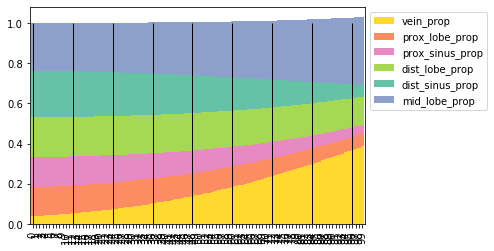

In [34]:
# For a chosen species, use the ´proportions()´ function
# to calculate proportions of different areas
# and plot across development using index i

chosen_species = "Vitis_amurensis"

vein_list = []
prox_lobe_list = []
prox_sinus_list = []
dist_lobe_list = []
dist_sinus_list = []
mid_lobe_list = []

for i in range(100):
    
    vein_prop, prox_lobe_prop, prox_sinus_prop, dist_lobe_prop, dist_sinus_prop, mid_lobe_prop = proportions(chosen_species, i)
    
    vein_list.append(vein_prop)
    prox_lobe_list.append(prox_lobe_prop)
    prox_sinus_list.append(prox_sinus_prop)
    dist_lobe_list.append(dist_lobe_prop)
    dist_sinus_list.append(dist_sinus_prop)
    mid_lobe_list.append(mid_lobe_prop)
    
prop_df = pd.DataFrame({'vein_prop':vein_list,
                        'prox_lobe_prop':prox_lobe_list,
                        'prox_sinus_prop':prox_sinus_list,
                        'dist_lobe_prop':dist_lobe_list,
                        'dist_sinus_prop':dist_sinus_list,
                        'mid_lobe_prop':mid_lobe_list}, index=range(100))

veins = "#ffd92f"
prox_lobe = "#fc8d62"
prox_sinus = "#e78ac3"
dist_lobe = "#a6d854"
dist_sinus = "#66c2a5"
mid_lobe = "#8da0cb"

my_colors = list(islice(cycle([veins, prox_lobe, prox_sinus, dist_lobe, dist_sinus, mid_lobe]), None, len(prop_df)))


plt.figure(figsize=(10,10))
ax = prop_df.plot.bar(stacked=True, width=1, color=my_colors)
plt.vlines(x=0, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.vlines(x=12, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.vlines(x=24, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.vlines(x=36, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.vlines(x=48, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.vlines(x=60, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.vlines(x=72, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.vlines(x=84, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.vlines(x=96, ymin=0, ymax=1, linewidth=1, alpha=1, color="k") 
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("./Figure_images/Figure3_amurensis.tif")
plt.axis('on')


In [35]:
# For each developmental series, calculate example inverse leaves
# for 9 points across the 100 point developmental series
# Save example leaves in a subfolder

# Select species to create developmental series for

species_selection = ["Vitis_riparia","Vitis_amurensis","Ampelopsis_brevipedunculata"]

# Select colors for the plots

veins = "#ffd92f"
prox_lobe = "#fc8d62"
prox_sinus = "#e78ac3"
dist_lobe = "#a6d854"
dist_sinus = "#66c2a5"
mid_lobe = "#8da0cb"

# Set index values to landmark names making it easier to calculate shoestring algorithm below
# Note: landmarks start at index position 1 through 42

x1=1 
y1=2
x2=3
y2=4
x3=5
y3=6
x4=7
y4=8
x5=9
y5=10
x6=11
y6=12
x7=13
y7=14
x8=15
y8=16
x9=17
y9=18
x10=19
y10=20
x11=21
y11=22
x12=23
y12=24
x13=25
y13=26
x14=27
y14=28
x15=29
y15=30
x16=31
y16=32
x17=33
y17=34
x18=35
y18=36
x19=37
y19=38
x20=39
y20=40
x21=41
y21=42


for spe in species_selection:
    
    chosen_species = spe

    j = species.index(chosen_species)

    #Create one array of PC1 and PC2 values for the species
    
    pca_array = np.column_stack((model_PC1[j], model_PC2[j]))

    #Apply the inverse transform function to the newly generated array to come up with a list of hypothetical leaf
    #shape data along the line of development
    
    inv_new = pca.inverse_transform(pca_array)

    for i in range(0,100,12):
        
        plt.figure(figsize=(5,10))

        # proximal vein
        plt.fill( [inv_new[i,x1],inv_new[i,x6],inv_new[i,x14],inv_new[i,x5], inv_new[i,x15], inv_new[i,x7], inv_new[i,x2]],
                  [inv_new[i,y1],inv_new[i,y6],inv_new[i,y14],inv_new[i,y5], inv_new[i,y15], inv_new[i,y7], inv_new[i,y2]],
                 color=veins
                )

        # distal vein
        plt.fill( [inv_new[i,x2],inv_new[i,x9],inv_new[i,x17],inv_new[i,x8], inv_new[i,x18], inv_new[i,x10], inv_new[i,x3]],
                  [inv_new[i,y2],inv_new[i,y9],inv_new[i,y17],inv_new[i,y8], inv_new[i,y18], inv_new[i,y10], inv_new[i,y3]],
                 color=veins
                 )

        # mid vein
        plt.fill( [inv_new[i,x3],inv_new[i,x12],inv_new[i,x20],inv_new[i,x11], inv_new[i,x21], inv_new[i,x13], inv_new[i,x4]],
                  [inv_new[i,y3],inv_new[i,y12],inv_new[i,y20],inv_new[i,y11], inv_new[i,y21], inv_new[i,y13], inv_new[i,y4]],
                 color=veins
                 )

        # proximal lobe
        plt.fill( [inv_new[i,x5],inv_new[i,x14],inv_new[i,x15]],
                  [inv_new[i,y5],inv_new[i,y14],inv_new[i,y15]],
                 color=prox_lobe
                 )

        # proximal sinus
        plt.fill( [inv_new[i,x2],inv_new[i,x7],inv_new[i,x15],inv_new[i,x16],inv_new[i,x17],inv_new[i,x9]],
                  [inv_new[i,y2],inv_new[i,y7],inv_new[i,y15],inv_new[i,y16],inv_new[i,y17],inv_new[i,y9]],
                 color=prox_sinus
                 )

        # distal lobe
        plt.fill( [inv_new[i,x8],inv_new[i,x17],inv_new[i,x18]],
                  [inv_new[i,y8],inv_new[i,y17],inv_new[i,y18]],
                 color=dist_lobe
                 )

        # distal sinus
        plt.fill( [inv_new[i,x3],inv_new[i,x10],inv_new[i,x18],inv_new[i,x19],inv_new[i,x20],inv_new[i,x12]],
                  [inv_new[i,y3],inv_new[i,y10],inv_new[i,y18],inv_new[i,y19],inv_new[i,y20],inv_new[i,y12]],
                 color=dist_sinus
                 )

        # mid lobe
        plt.fill( [inv_new[i,x11],inv_new[i,x20],inv_new[i,x21]],
                  [inv_new[i,y11],inv_new[i,y20],inv_new[i,y21]],
                 color=mid_lobe
                 )
    
        plt.axes().set_aspect('equal', 'box')
        plt.axis('off')
        
        name = spe + "_" + str(i)
        plt.savefig("./Figure_images/Figure3_trajectories/" + name + ".jpg")
        
        plt.close()


/Users/chitwood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:132: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


________
## Figure 4
### *Leaf shape at the limits of what exists*

Having defined a morphospace, examine leaf shapes just outside the limits that define the boundary of experimentally measured grapevine leaves. Three lines will be defined that encompass all measured leaves. Theoretical leaves along these lines will be reconstructed using the inverse PCA function.

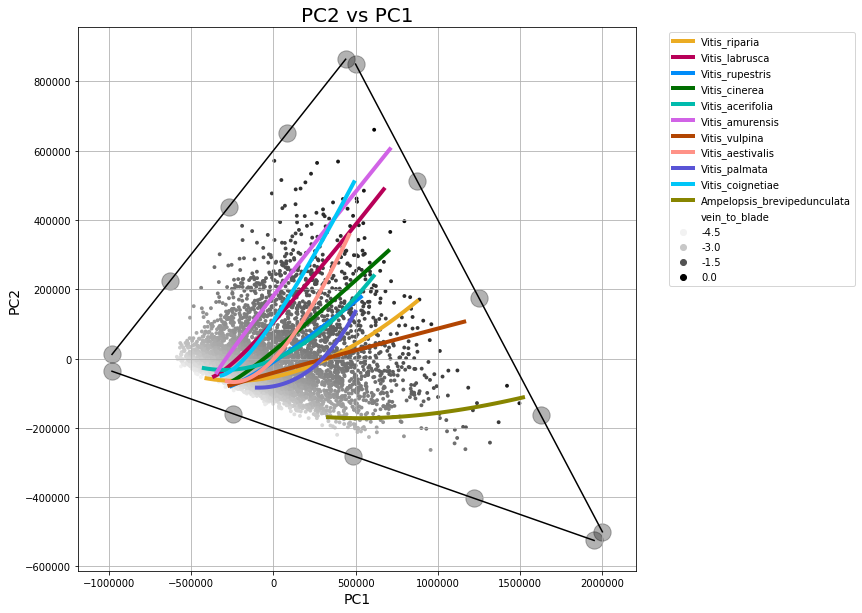

In [44]:
# Define boundaries, where the "bottom", "left", and "top" lines
# refer to the different boundaries

# The following are used to orient and calculate the three border lines
# np.linspaaace is used to take 5 equidistant points for each line
# for which theoretical leaf shapes will be calculated

bottom1x = -500000
bottom1y = 0
bottom2x = 1000000
bottom2y = -250000
bottom_slope = (bottom2y-bottom1y) / (bottom2x - bottom1x)
bottom_yinter = -200000
bottom_xvals = np.linspace(-980000,1950000,5)
bottom_yvals = bottom_xvals*bottom_slope + bottom_yinter

left1x = -500000
left1y = 400000
left2x = 0
left2y = 700000
left_slope = (left2y-left1y) / (left2x - left1x)
left_yinter = 600000
left_xvals = np.linspace(-980000,440000,5)
left_yvals = left_xvals*left_slope + left_yinter

top1x = 750000
top1y = 600000
top2x = 1000000
top2y = 375000
top_slope = (top2y-top1y) / (top2x - top1x)
top_yinter = 1300000
top_xvals = np.linspace(500000,2000000,5)
top_yvals = top_xvals*top_slope + top_yinter

# Plot out lines to confirm they form a boundary

# Colors from http://tsitsul.in/blog/coloropt/ for optimal color perception for 12 colors

color_list = ["#ebac23","#b80058","#008cf9","#006e00","#00bbad","#d163e6","#b24502","#ff9287","#5954d6","#00c6f8","#878500","#00a76c"] 

plt.figure(figsize=(10,10))

for i in range(11):

    plt.plot(model_PC1[i], model_PC2[i], label=species_list[i], color=color_list[i], linewidth=4)

sns.scatterplot(data=data_PCs, x='PC1',y='PC2', color="k", hue="vein_to_blade", s=15, linewidth=0, palette=sns.light_palette("black", as_cmap=True))

plt.scatter(bottom_xvals, bottom_yvals, s=300, alpha=0.3, color="k")
plt.scatter(left_xvals, left_yvals, s=300, alpha=0.3, color="k")
plt.scatter(top_xvals, top_yvals, s=300, alpha=0.3, color="k")

plt.plot(bottom_xvals, bottom_yvals, color="k")
plt.plot(left_xvals, left_yvals, color="k")
plt.plot(top_xvals, top_yvals, color="k")

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')   
plt.title('PC2 vs PC1', fontsize = 20)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.grid()
plt.savefig("./Figure_images/Figure4.jpg")
plt.show()


Next, for each point on the boundary, visualize the theoretical leaf shape. Leaf shapes will be saved in the order of the left, top, and bottom axes, with increasing PC1 values, 5 leaves per an axis for the points indicated.

In [45]:
# Create lists with xvals and yvals for each of 3 lines

axes_xvals = [left_xvals, top_xvals, bottom_xvals]
axes_yvals = [left_yvals, top_yvals, bottom_yvals]

# Create a list of strings to name outputs

output_names = ["left", "top", "bottom"]

# Colors, consistent with other plots of leaf shape

veins = "#ffd92f"
prox_lobe = "#fc8d62"
prox_sinus = "#e78ac3"
dist_lobe = "#a6d854"
dist_sinus = "#66c2a5"
mid_lobe = "#8da0cb"

# Set index values to landmark names making it easier to calculate shoestring algorithm below
# Note: landmarks start at index position 1 through 42

x1=1 
y1=2
x2=3
y2=4
x3=5
y3=6
x4=7
y4=8
x5=9
y5=10
x6=11
y6=12
x7=13
y7=14
x8=15
y8=16
x9=17
y9=18
x10=19
y10=20
x11=21
y11=22
x12=23
y12=24
x13=25
y13=26
x14=27
y14=28
x15=29
y15=30
x16=31
y16=32
x17=33
y17=34
x18=35
y18=36
x19=37
y19=38
x20=39
y20=40
x21=41
y21=42

# Loop over points for each line

for j in range(3):
    
    pca_array = np.column_stack((axes_xvals[j], axes_yvals[j]))

    # Apply the inverse transform function to the newly generated array
    # to come up with a list of hypothetical leaf
    # shape data along each border line
    
    inv_new = pca.inverse_transform(pca_array)
    
    # Set name for saving outputs
    
    output_name = output_names[j]

    # Next, plot the leaves, looping over each of 10 points
    
    for i in range(5):
        
        plt.figure(figsize=(5,10))

        # proximal vein
        plt.fill( [inv_new[i,x1],inv_new[i,x6],inv_new[i,x14],inv_new[i,x5], inv_new[i,x15], inv_new[i,x7], inv_new[i,x2]],
                  [inv_new[i,y1],inv_new[i,y6],inv_new[i,y14],inv_new[i,y5], inv_new[i,y15], inv_new[i,y7], inv_new[i,y2]],
                 color=veins
                )

        # distal vein
        plt.fill( [inv_new[i,x2],inv_new[i,x9],inv_new[i,x17],inv_new[i,x8], inv_new[i,x18], inv_new[i,x10], inv_new[i,x3]],
                  [inv_new[i,y2],inv_new[i,y9],inv_new[i,y17],inv_new[i,y8], inv_new[i,y18], inv_new[i,y10], inv_new[i,y3]],
                 color=veins
                 )

        # mid vein
        plt.fill( [inv_new[i,x3],inv_new[i,x12],inv_new[i,x20],inv_new[i,x11], inv_new[i,x21], inv_new[i,x13], inv_new[i,x4]],
                  [inv_new[i,y3],inv_new[i,y12],inv_new[i,y20],inv_new[i,y11], inv_new[i,y21], inv_new[i,y13], inv_new[i,y4]],
                 color=veins
                 )

        # proximal lobe
        plt.fill( [inv_new[i,x5],inv_new[i,x14],inv_new[i,x15]],
                  [inv_new[i,y5],inv_new[i,y14],inv_new[i,y15]],
                 color=prox_lobe
                 )

        # proximal sinus
        plt.fill( [inv_new[i,x2],inv_new[i,x7],inv_new[i,x15],inv_new[i,x16],inv_new[i,x17],inv_new[i,x9]],
                  [inv_new[i,y2],inv_new[i,y7],inv_new[i,y15],inv_new[i,y16],inv_new[i,y17],inv_new[i,y9]],
                 color=prox_sinus
                 )

        # distal lobe
        plt.fill( [inv_new[i,x8],inv_new[i,x17],inv_new[i,x18]],
                  [inv_new[i,y8],inv_new[i,y17],inv_new[i,y18]],
                 color=dist_lobe
                 )

        # distal sinus
        plt.fill( [inv_new[i,x3],inv_new[i,x10],inv_new[i,x18],inv_new[i,x19],inv_new[i,x20],inv_new[i,x12]],
                  [inv_new[i,y3],inv_new[i,y10],inv_new[i,y18],inv_new[i,y19],inv_new[i,y20],inv_new[i,y12]],
                 color=dist_sinus
                 )

        # mid lobe
        plt.fill( [inv_new[i,x11],inv_new[i,x20],inv_new[i,x21]],
                  [inv_new[i,y11],inv_new[i,y20],inv_new[i,y21]],
                 color=mid_lobe
                 )
    
        plt.axes().set_aspect('equal', 'box')
        plt.axis('off')
        
        name = output_name + "_" + str(i)
        plt.savefig("./Figure_images/Figure4_boundaries/" + name + ".jpg")
        
        plt.close()


/Users/chitwood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:135: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


_______
## Figures 5 and 6
### *Leaf shape constrained by development*

The leaves at the limit of what exists do not necessarily indicate the boudnaries of what is possible. It may be possible for plants to produce leaves beyond these limits, but either selection or chance has prevented such leaves from existing. There is a set of leaves that plants can make but do not and another set beyond these that are not possible for plants to produce (developmental constraint).

Within the 2D landmark space we have measured, we will use self-intersection of any sub-area polygon in the leaf and as indication of developmental constraint (a leaf that can not be produced under aany circumstance). The morphospace will be sampled at regular intervals and it will be determined if theoretical leaves are developmentally constrained. Theoretical leaves at each point in the morphospace will be reconstructed.

The self-intersection algorithm is an implementation of the Bentley Ottmann sweep-line algorithm from [https://github.com/ideasman42/isect_segments-bentley_ottmann](https://github.com/ideasman42/isect_segments-bentley_ottmann), (c) 2010 by Bart Kiers and (c) 2015 by Campell Barton, MIT license. A copy of the function used is at the end of this notebook, in case the repository is lost at any point for reproducibility. There are known stability issues using this algorithm, with respect to parallel lines that result during the sweep. These instabilities are incountered in this implementation, and are avoided by modifying the linspace points sampled in the morphospaace manually until the algorithm works. The results produced by the algorithm are consistent (that is, it consistently detects self-intersection in the same parts of the morphospace, even when the points sampled changes).

In [50]:
# Create grid of PC1 and PC2 values to analyze

intersect_PC1_vals = []
intersect_PC2_vals = []

# Note: the instabilities of the Bentley Ottmann sweep-line algorithm need to be
# overcome by modifying the grid of values used. Usually modifying the x range
# by trial and error is sufficient. Usually the larger the ranges,
# the more likely an error occurs

for i in np.linspace(-4410000, 2100000, 10): # maximum PC1 value range obtained: -4410000, 2100000
    
    xval = i
    
    for j in np.linspace(-500000, 1180000, 10): # maximum PC2 value range obtained: -500000, 1180000
        
        yval = j
        
    
        intersect_PC1_vals.append(xval)
        intersect_PC2_vals.append(yval)

# Create PC array from the grid values
        
pca_array = np.column_stack((intersect_PC1_vals, intersect_PC2_vals))

# Apply the inverse transform function to the newly generated array to
# come up with a list of hypothetical leaf shape data 

inv_new = pca.inverse_transform(pca_array)

# It was suggested that more decimal places could overcome the instability,
# but already a sufficient number of decimals is included
# inv_new = np.round(inv_new, 60)

# Set index values to landmark names making it easier to calculate shoestring algorithm below
# Note: landmarks start at index position 1 through 42

x1=1 
y1=2
x2=3
y2=4
x3=5
y3=6
x4=7
y4=8
x5=9
y5=10
x6=11
y6=12
x7=13
y7=14
x8=15
y8=16
x9=17
y9=18
x10=19
y10=20
x11=21
y11=22
x12=23
y12=24
x13=25
y13=26
x14=27
y14=28
x15=29
y15=30
x16=31
y16=32
x17=33
y17=34
x18=35
y18=36
x19=37
y19=38
x20=39
y20=40
x21=41
y21=42

# Create an empty list to contain the number of self-intersections detected

sum_cross_list = []

# Calculate self-intersections

for i in range(100):
    
    prox_vein_poly = (
        (inv_new[i,x1],inv_new[i,y1]),
        (inv_new[i,x6],inv_new[i,y6]),
        (inv_new[i,x14],inv_new[i,y14]),
        (inv_new[i,x5],inv_new[i,y5]),
        (inv_new[i,x15],inv_new[i,y15]),
        (inv_new[i,x7],inv_new[i,y7]),
        (inv_new[i,x2],inv_new[i,y2])
    )
    
    dist_vein_poly = (
        (inv_new[i,x2],inv_new[i,y2]),
        (inv_new[i,x9],inv_new[i,y9]),
        (inv_new[i,x17],inv_new[i,y17]),
        (inv_new[i,x8],inv_new[i,y8]),
        (inv_new[i,x18],inv_new[i,y18]),
        (inv_new[i,x10],inv_new[i,y10]),
        (inv_new[i,x3],inv_new[i,y3])
    )

    mid_vein_poly = (
        (inv_new[i,x3],inv_new[i,y3]),
        (inv_new[i,x12],inv_new[i,y12]),
        (inv_new[i,x20],inv_new[i,y20]),
        (inv_new[i,x11],inv_new[i,y11]),
        (inv_new[i,x21],inv_new[i,y21]),
        (inv_new[i,x13],inv_new[i,y13]),
        (inv_new[i,x4],inv_new[i,y4])
    )
        
    prox_lobe_poly = (
        (inv_new[i,x5],inv_new[i,y5]),
        (inv_new[i,x14],inv_new[i,y14]),
        (inv_new[i,x15],inv_new[i,y15])
    )
        
    prox_sinus_poly = (
        (inv_new[i,x2],inv_new[i,y2]),
        (inv_new[i,x7],inv_new[i,y7]),
        (inv_new[i,x15],inv_new[i,y15]),
        (inv_new[i,x16],inv_new[i,y16]),
        (inv_new[i,x17],inv_new[i,y17]),
        (inv_new[i,x9],inv_new[i,y9])
    )
        
    dist_lobe_poly = (
        (inv_new[i,x8],inv_new[i,y8]),
        (inv_new[i,x17],inv_new[i,y17]),
        (inv_new[i,x18],inv_new[i,y18])
    )
        
    dist_sinus_poly = (
        (inv_new[i,x3],inv_new[i,y3]),
        (inv_new[i,x10],inv_new[i,y10]),
        (inv_new[i,x18],inv_new[i,y18]),
        (inv_new[i,x19],inv_new[i,y19]),
        (inv_new[i,x20],inv_new[i,y20]),
        (inv_new[i,x12],inv_new[i,y12])
    )
        
        
    mid_lobe_poly = (
        (inv_new[i,x11],inv_new[i,y11]),
        (inv_new[i,x20],inv_new[i,y20]),
        (inv_new[i,x21],inv_new[i,y21])
    )
    
    # Use length to find the number of self-intersections for each region
        
    prox_vein_crosses = len(isect_polygon(prox_vein_poly))
    dist_vein_crosses = len(isect_polygon(dist_vein_poly))
    mid_vein_crosses = len(isect_polygon(mid_vein_poly))
    prox_lobe_crosses = len(isect_polygon(prox_lobe_poly))
    prox_sinus_crosses = len(isect_polygon(prox_sinus_poly))
    dist_lobe_crosses = len(isect_polygon(dist_lobe_poly))
    dist_sinus_crosses = len(isect_polygon(dist_sinus_poly))
    mid_lobe_crosses = len(isect_polygon(mid_lobe_poly))
    
    # Append the total number of self-intersections per leaf

    sum_cross_list.append(prox_vein_crosses+dist_vein_crosses+mid_vein_crosses+prox_lobe_crosses+prox_sinus_crosses+dist_lobe_crosses+dist_sinus_crosses+mid_lobe_crosses)
    

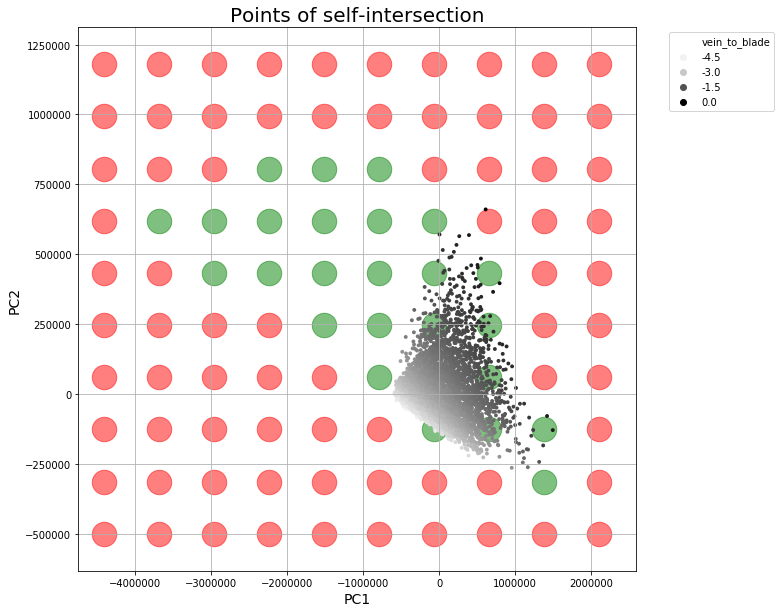

In [53]:
# Visualize which points in the morphospace contain self-intersection

plt.figure(figsize=(10,10))

for i in range(len(intersect_PC1_vals)):
    
    if sum_cross_list[i] == 0:
        my_color = "green"
    else:
        my_color = "red"
    
    plt.scatter(intersect_PC1_vals[i], intersect_PC2_vals[i], c=my_color, alpha=0.5, s=600)

sns.scatterplot(data=data_PCs, x='PC1',y='PC2', color="k", hue="vein_to_blade", s=15, linewidth=0, palette=sns.light_palette("black", as_cmap=True))
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
plt.title('Points of self-intersection', fontsize = 20)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.grid()
plt.savefig("./Figure_images/Figure5A.jpg")
plt.show()


In [56]:
# Create theoretical leaves for each of the 100 points in the grid above
# Indexing proceeds from left to right, bottom to top

# Colors of different sub-areas

veins = "#ffd92f"
prox_lobe = "#fc8d62"
prox_sinus = "#e78ac3"
dist_lobe = "#a6d854"
dist_sinus = "#66c2a5"
mid_lobe = "#8da0cb"

# Set the alpha (to see self-intersection)

aval = 0.5

# Set index values to landmark names making it easier to calculate shoestring algorithm below
# Note: landmarks start at index position 1 through 42

x1=1 
y1=2
x2=3
y2=4
x3=5
y3=6
x4=7
y4=8
x5=9
y5=10
x6=11
y6=12
x7=13
y7=14
x8=15
y8=16
x9=17
y9=18
x10=19
y10=20
x11=21
y11=22
x12=23
y12=24
x13=25
y13=26
x14=27
y14=28
x15=29
y15=30
x16=31
y16=32
x17=33
y17=34
x18=35
y18=36
x19=37
y19=38
x20=39
y20=40
x21=41
y21=42

# Loop over each of 100 points, left to right, bottom to top

for i in range(100):
    
    plt.figure(figsize=(5,10))

    # proximal vein
    plt.fill( [inv_new[i,x1],inv_new[i,x6],inv_new[i,x14],inv_new[i,x5], inv_new[i,x15], inv_new[i,x7], inv_new[i,x2]],
              [inv_new[i,y1],inv_new[i,y6],inv_new[i,y14],inv_new[i,y5], inv_new[i,y15], inv_new[i,y7], inv_new[i,y2]],
             color=veins, alpha=aval
            )

    # distal vein
    plt.fill( [inv_new[i,x2],inv_new[i,x9],inv_new[i,x17],inv_new[i,x8], inv_new[i,x18], inv_new[i,x10], inv_new[i,x3]],
              [inv_new[i,y2],inv_new[i,y9],inv_new[i,y17],inv_new[i,y8], inv_new[i,y18], inv_new[i,y10], inv_new[i,y3]],
             color=veins, alpha=aval
             )

    # mid vein
    plt.fill( [inv_new[i,x3],inv_new[i,x12],inv_new[i,x20],inv_new[i,x11], inv_new[i,x21], inv_new[i,x13], inv_new[i,x4]],
              [inv_new[i,y3],inv_new[i,y12],inv_new[i,y20],inv_new[i,y11], inv_new[i,y21], inv_new[i,y13], inv_new[i,y4]],
             color=veins, alpha=aval
             )

    # proximal lobe
    plt.fill( [inv_new[i,x5],inv_new[i,x14],inv_new[i,x15]],
              [inv_new[i,y5],inv_new[i,y14],inv_new[i,y15]],
             color=prox_lobe, alpha=aval
             )

    # proximal sinus
    plt.fill( [inv_new[i,x2],inv_new[i,x7],inv_new[i,x15],inv_new[i,x16],inv_new[i,x17],inv_new[i,x9]],
              [inv_new[i,y2],inv_new[i,y7],inv_new[i,y15],inv_new[i,y16],inv_new[i,y17],inv_new[i,y9]],
             color=prox_sinus, alpha=aval
             )

    # distal lobe
    plt.fill( [inv_new[i,x8],inv_new[i,x17],inv_new[i,x18]],
              [inv_new[i,y8],inv_new[i,y17],inv_new[i,y18]],
             color=dist_lobe, alpha=aval
             )

    # distal sinus
    plt.fill( [inv_new[i,x3],inv_new[i,x10],inv_new[i,x18],inv_new[i,x19],inv_new[i,x20],inv_new[i,x12]],
              [inv_new[i,y3],inv_new[i,y10],inv_new[i,y18],inv_new[i,y19],inv_new[i,y20],inv_new[i,y12]],
             color=dist_sinus, alpha=aval
             )

    # mid lobe
    plt.fill( [inv_new[i,x11],inv_new[i,x20],inv_new[i,x21]],
              [inv_new[i,y11],inv_new[i,y20],inv_new[i,y21]],
             color=mid_lobe, alpha=aval
             )

    plt.axes().set_aspect('equal', 'box')
    plt.axis('off')

    name = "x_" + str(i)
    plt.savefig("./Figure_images/Figure5_intersection/" + name + ".jpg") # Save outputs

    plt.close()

/Users/chitwood/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [57]:
# Finally, create a plot with the grid points colored by vein-to-blade ratio

# Create a pandas dataframe to more easily calculate vein-to-blade ratio using previous code
# Name columns to elimnate indexing

cols = ['col0','x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8','x9','y9','x10','y10','x11','y11','x12','y12','x13','y13','x14','y14','x15','y15',
        'x16','y16','x17','y17','x18','y18','x19','y19','x20','y20','x21','y21','col42','col43','col44','col45','col46','col47','col48']

df = pd.DataFrame(inv_new, columns=cols)

# Calculate the overall area of a leaf using the shoestring algorithm
# Note: procrustes coordinates, so not absolute area

df['all_area'] = (0.5)*abs(

(df['x4']*df['y3'] + df['x3']*df['y2'] + df['x2']*df['y1'] + df['x1']*df['y6'] + df['x6']*df['y14'] + df['x14']*df['y15'] + df['x15']*df['y16'] + df['x16']*df['y17'] + df['x17']*df['y18'] + df['x18']*df['y19'] + df['x19']*df['y20'] + df['x20']*df['y21'] + df['x21']*df['y13'] + df['x13']*df['y4']) - 

(df['y4']*df['x3'] + df['y3']*df['x2'] + df['y2']*df['x1'] + df['y1']*df['x6'] + df['y6']*df['x14'] + df['y14']*df['x15'] + df['y15']*df['x16'] + df['y16']*df['x17'] + df['y17']*df['x18'] + df['y18']*df['x19'] + df['y19']*df['x20'] + df['y20']*df['x21'] + df['y21']*df['x13'] + df['y13']*df['x4']) 

)

# Calculate the area of the proximal veins

df['prox'] = (0.5)*abs(

(df['x2']*df['y1'] + df['x1']*df['y6'] + df['x6']*df['y14'] + df['x14']*df['y5'] + df['x5']*df['y15'] + df['x15']*df['y7'] + df['x7']*df['y2']) -

(df['y2']*df['x1'] + df['y1']*df['x6'] + df['y6']*df['x14'] + df['y14']*df['x5'] + df['y5']*df['x15'] + df['y15']*df['x7'] + df['y7']*df['x2'])

)

# Calculate the area of the distal veins

df['dist'] = (0.5)*abs(

(df['x3']*df['y2'] + df['x2']*df['y9'] + df['x9']*df['y17'] + df['x17']*df['y8'] + df['x8']*df['y18'] + df['x18']*df['y10'] + df['x10']*df['y3']) -

(df['y3']*df['x2'] + df['y2']*df['x9'] + df['y9']*df['x17'] + df['y17']*df['x8'] + df['y8']*df['x18'] + df['y18']*df['x10'] + df['y10']*df['x3'])

)


# Calculate the area of the midveins

df['mid'] = (0.5)*abs(

(df['x4']*df['y3'] + df['x3']*df['y12'] + df['x12']*df['y20'] + df['x20']*df['y11'] + df['x11']*df['y21'] + df['x21']*df['y13'] + df['x13']*df['y4']) -

(df['y4']*df['x3'] + df['y3']*df['x12'] + df['y12']*df['x20'] + df['y20']*df['x11'] + df['y11']*df['x21'] + df['y21']*df['x13'] + df['y13']*df['x4'])

)

# Calculate overall vein area as the sum of the proximal, distal, and midveins

df['veins'] = df['prox'] + df['dist'] + df['mid']

# Calculate blade area as the overall area of the leaf minus vein area

df['blade'] = df['all_area'] - df['veins']

# Calculate vein-to-blade ratio 
# Use natural log transformation

df['vein_to_blade'] = np.log(df['veins'] / df['blade'])

# Add the grid point PC values to the dataframe as well

pca_array = np.column_stack((intersect_PC1_vals, intersect_PC2_vals))

PCs_df = pd.DataFrame(pca_array)
PCs_df.columns = ['intersectPC1','intersectPC2']

data_PCs_intersect = pd.concat([df.reset_index(drop=True), PCs_df.reset_index(drop=True)], axis=1)

# Eliminate extraneous columns

cols=[range(42,50)]

data_PCs_intersect.drop(data_PCs_intersect.columns[cols], axis=1, inplace=True)

data_PCs_intersect.drop(data_PCs_intersect.columns[0], axis=1, inplace=True)

data_PCs_intersect.columns

/Users/chitwood/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:3969: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


Index(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6',
       'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
       'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17',
       'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'all_area',
       'prox', 'dist', 'mid', 'veins', 'blade', 'vein_to_blade',
       'intersectPC1', 'intersectPC2'],
      dtype='object')

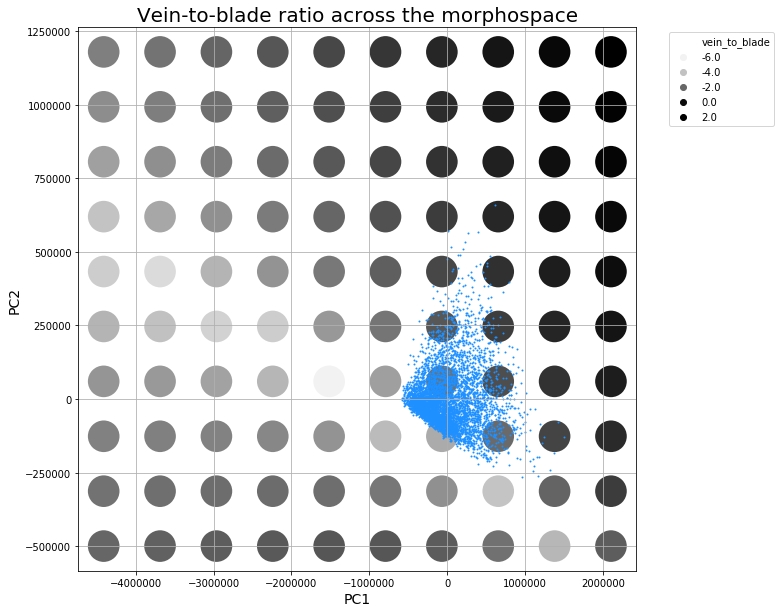

In [61]:
# Create a plot of vein-to-blade ratio for the 100 grid points
# with empirical data shown for context

plt.figure(figsize=(10,10))

sns.scatterplot(data=data_PCs_intersect, x='intersectPC1',y='intersectPC2', color="k", hue="vein_to_blade", s=1000, linewidth=0, palette=sns.light_palette("black", as_cmap=True))
sns.scatterplot(data=data_PCs, x='PC1',y='PC2', color="dodgerblue", s=4, linewidth=0, palette=sns.light_palette("black", as_cmap=True))

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') 
plt.title('Vein-to-blade ratio across the morphospace', fontsize = 20)
plt.xlabel('PC1', fontsize = 14)
plt.ylabel('PC2', fontsize = 14)
plt.grid()
plt.savefig("./Figure_images/Figure5B.jpg")
plt.show()


____
## Function for detecting self-intersection

In [46]:
# Copyright (c) 2010 by Bart Kiers
# Copyright (c) 2015 by Campbell Barton

# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

# The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.


# https://github.com/ideasman42/isect_segments-bentley_ottmann
# BentleyOttmann sweep-line implementation
# (for finding all intersections in a set of line segments)

from __future__ import annotations

__all__ = (
    "isect_segments",
    "isect_polygon",

    # same as above but includes segments with each intersections
    "isect_segments_include_segments",
    "isect_polygon_include_segments",

    # for testing only (correct but slow)
    "isect_segments__naive",
    "isect_polygon__naive",
)

# ----------------------------------------------------------------------------
# Main Poly Intersection

# Defines to change behavior.
#
# Whether to ignore intersections of line segments when both
# their end points form the intersection point.
USE_IGNORE_SEGMENT_ENDINGS = True

USE_DEBUG = True

USE_VERBOSE = False

# checks we should NOT need,
# but do them in case we find a test-case that fails.
USE_PARANOID = False

# Support vertical segments,
# (the bentley-ottmann method doesn't support this).
# We use the term 'START_VERTICAL' for a vertical segment,
# to differentiate it from START/END/INTERSECTION
USE_VERTICAL = True
# end defines!
# ------------

# ---------
# Constants
X, Y = 0, 1

# -----------------------------------------------------------------------------
# Switchable Number Implementation

NUMBER_TYPE = 'native'

if NUMBER_TYPE == 'native':
    Real = float
    NUM_EPS = Real("1e-10")
    NUM_INF = Real(float("inf"))
elif NUMBER_TYPE == 'decimal':
    # Not passing tests!
    import decimal
    Real = decimal.Decimal
    decimal.getcontext().prec = 80
    NUM_EPS = Real("1e-10")
    NUM_INF = Real(float("inf"))
elif NUMBER_TYPE == 'numpy':
    import numpy
    Real = numpy.float64
    del numpy
    NUM_EPS = Real("1e-10")
    NUM_INF = Real(float("inf"))
elif NUMBER_TYPE == 'gmpy2':
    # Not passing tests!
    import gmpy2
    gmpy2.set_context(gmpy2.ieee(128))
    Real = gmpy2.mpz
    NUM_EPS = Real(float("1e-10"))
    NUM_INF = gmpy2.get_emax_max()
    del gmpy2
else:
    raise Exception("Type not found")

NUM_EPS_SQ = NUM_EPS * NUM_EPS
NUM_ZERO = Real(0.0)
NUM_ONE = Real(1.0)


class Event:
    __slots__ = (
        "type",
        "point",
        "segment",

        # this is just cache,
        # we may remove or calculate slope on the fly
        "slope",
        "span",
    ) + (() if not USE_DEBUG else (
        # debugging only
        "other",
        "in_sweep",
    ))

    class Type:
        END = 0
        INTERSECTION = 1
        START = 2
        if USE_VERTICAL:
            START_VERTICAL = 3

    def __init__(self, type, point, segment, slope):
        assert(isinstance(point, tuple))
        self.type = type
        self.point = point
        self.segment = segment

        # will be None for INTERSECTION
        self.slope = slope
        if segment is not None:
            self.span = segment[1][X] - segment[0][X]

        if USE_DEBUG:
            self.other = None
            self.in_sweep = False

    # note that this isn't essential,
    # it just avoids non-deterministic ordering, see #9.
    def __hash__(self):
        return hash(self.point)

    def is_vertical(self):
        # return self.segment[0][X] == self.segment[1][X]
        return self.span == NUM_ZERO

    def y_intercept_x(self, x: Real):
        # vertical events only for comparison (above_all check)
        # never added into the binary-tree its self
        if USE_VERTICAL:
            if self.is_vertical():
                return None

        if x <= self.segment[0][X]:
            return self.segment[0][Y]
        elif x >= self.segment[1][X]:
            return self.segment[1][Y]

        # use the largest to avoid float precision error with nearly vertical lines.
        delta_x0 = x - self.segment[0][X]
        delta_x1 = self.segment[1][X] - x
        if delta_x0 > delta_x1:
            ifac = delta_x0 / self.span
            fac = NUM_ONE - ifac
        else:
            fac = delta_x1 / self.span
            ifac = NUM_ONE - fac
        assert(fac <= NUM_ONE)
        return (self.segment[0][Y] * fac) + (self.segment[1][Y] * ifac)

    @staticmethod
    def Compare(sweep_line, this, that):
        if this is that:
            return 0
        if USE_DEBUG:
            if this.other is that:
                return 0
        current_point_x = sweep_line._current_event_point_x
        this_y = this.y_intercept_x(current_point_x)
        that_y = that.y_intercept_x(current_point_x)
        # print(this_y, that_y)
        if USE_VERTICAL:
            if this_y is None:
                this_y = this.point[Y]
            if that_y is None:
                that_y = that.point[Y]

        delta_y = this_y - that_y

        assert((delta_y < NUM_ZERO) == (this_y < that_y))
        # NOTE, VERY IMPORTANT TO USE EPSILON HERE!
        # otherwise w/ float precision errors we get incorrect comparisons
        # can get very strange & hard to debug output without this.
        if abs(delta_y) > NUM_EPS:
            return -1 if (delta_y < NUM_ZERO) else 1
        else:
            this_slope = this.slope
            that_slope = that.slope
            if this_slope != that_slope:
                if sweep_line._before:
                    return -1 if (this_slope > that_slope) else 1
                else:
                    return 1 if (this_slope > that_slope) else -1

        delta_x_p1 = this.segment[0][X] - that.segment[0][X]
        if delta_x_p1 != NUM_ZERO:
            return -1 if (delta_x_p1 < NUM_ZERO) else 1

        delta_x_p2 = this.segment[1][X] - that.segment[1][X]
        if delta_x_p2 != NUM_ZERO:
            return -1 if (delta_x_p2 < NUM_ZERO) else 1

        return 0

    def __repr__(self):
        return ("Event(0x%x, s0=%r, s1=%r, p=%r, type=%d, slope=%r)" % (
            id(self),
            self.segment[0], self.segment[1],
            self.point,
            self.type,
            self.slope,
        ))


class SweepLine:
    __slots__ = (
        # A map holding all intersection points mapped to the Events
        # that form these intersections.
        # {Point: set(Event, ...), ...}
        "intersections",
        "queue",

        # Events (sorted set of ordered events, no values)
        #
        # note: START & END events are considered the same so checking if an event is in the tree
        # will return true if its opposite side is found.
        # This is essential for the algorithm to work, and why we don't explicitly remove START events.
        # Instead, the END events are never added to the current sweep, and removing them also removes the start.
        "_events_current_sweep",
        # The point of the current Event.
        "_current_event_point_x",
        # A flag to indicate if we're slightly before or after the line.
        "_before",
    )

    def __init__(self, queue: EventQueue):
        self.intersections = {}
        self.queue = queue

        self._current_event_point_x = None
        self._events_current_sweep = RBTree(cmp=Event.Compare, cmp_data=self)
        self._before = True

    def get_intersections(self):
        """
        Return a list of unordered intersection points.
        """
        if Real is float:
            return list(self.intersections.keys())
        else:
            return [(float(p[0]), float(p[1])) for p in self.intersections.keys()]

    # Not essential for implementing this algorithm, but useful.
    def get_intersections_with_segments(self):
        """
        Return a list of unordered intersection '(point, segment)' pairs,
        where segments may contain 2 or more values.
        """
        if Real is float:
            return [
                (p, [event.segment for event in event_set])
                for p, event_set in self.intersections.items()
            ]
        else:
            return [
                (
                    (float(p[0]), float(p[1])),
                    [((float(event.segment[0][0]), float(event.segment[0][1])),
                      (float(event.segment[1][0]), float(event.segment[1][1])))
                     for event in event_set],
                )
                for p, event_set in self.intersections.items()
            ]

    # Checks if an intersection exists between two Events 'a' and 'b'.
    def _check_intersection(self, a: Event, b: Event):
        # Return immediately in case either of the events is null, or
        # if one of them is an INTERSECTION event.
        if (
                (a is None or b is None) or
                (a.type == Event.Type.INTERSECTION) or
                (b.type == Event.Type.INTERSECTION)
        ):
            return

        if a is b:
            return

        # Get the intersection point between 'a' and 'b'.
        p = isect_seg_seg_v2_point(
            a.segment[0], a.segment[1],
            b.segment[0], b.segment[1],
        )

        # No intersection exists.
        if p is None:
            return

        # If the intersection is formed by both the segment endings, AND
        # USE_IGNORE_SEGMENT_ENDINGS is true,
        # return from this method.
        if USE_IGNORE_SEGMENT_ENDINGS:
            if ((len_squared_v2v2(p, a.segment[0]) < NUM_EPS_SQ or
                 len_squared_v2v2(p, a.segment[1]) < NUM_EPS_SQ) and
                (len_squared_v2v2(p, b.segment[0]) < NUM_EPS_SQ or
                 len_squared_v2v2(p, b.segment[1]) < NUM_EPS_SQ)):

                return

        # Add the intersection.
        events_for_point = self.intersections.pop(p, set())
        is_new = len(events_for_point) == 0
        events_for_point.add(a)
        events_for_point.add(b)
        self.intersections[p] = events_for_point

        # If the intersection occurs to the right of the sweep line, OR
        # if the intersection is on the sweep line and it's above the
        # current event-point, add it as a new Event to the queue.
        if is_new and p[X] >= self._current_event_point_x:
            event_isect = Event(Event.Type.INTERSECTION, p, None, None)
            self.queue.offer(p, event_isect)

    def _sweep_to(self, p):
        if p[X] == self._current_event_point_x:
            # happens in rare cases,
            # we can safely ignore
            return

        self._current_event_point_x = p[X]

    def insert(self, event):
        assert(event not in self._events_current_sweep)
        assert(not USE_VERTICAL or event.type != Event.Type.START_VERTICAL)
        if USE_DEBUG:
            assert(event.in_sweep == False)
            assert(event.other.in_sweep == False)

        self._events_current_sweep.insert(event, None)

        if USE_DEBUG:
            event.in_sweep = True
            event.other.in_sweep = True

    def remove(self, event):
        try:
            self._events_current_sweep.remove(event)
            if USE_DEBUG:
                assert(event.in_sweep == True)
                assert(event.other.in_sweep == True)
                event.in_sweep = False
                event.other.in_sweep = False
            return True
        except KeyError:
            if USE_DEBUG:
                assert(event.in_sweep == False)
                assert(event.other.in_sweep == False)
            return False

    def above(self, event):
        return self._events_current_sweep.succ_key(event, None)

    def below(self, event):
        return self._events_current_sweep.prev_key(event, None)

    '''
    def above_all(self, event):
        while True:
            event = self.above(event)
            if event is None:
                break
            yield event
    '''

    def above_all(self, event):
        # assert(event not in self._events_current_sweep)
        return self._events_current_sweep.key_slice(event, None, reverse=False)

    def handle(self, p, events_current):
        if len(events_current) == 0:
            return
        # done already
        # self._sweep_to(events_current[0])
        assert(p[0] == self._current_event_point_x)

        if not USE_IGNORE_SEGMENT_ENDINGS:
            if len(events_current) > 1:
                for i in range(0, len(events_current) - 1):
                    for j in range(i + 1, len(events_current)):
                        self._check_intersection(
                            events_current[i], events_current[j])

        for e in events_current:
            self.handle_event(e)

    def handle_event(self, event):
        t = event.type
        if t == Event.Type.START:
            # print("  START")
            self._before = False
            self.insert(event)

            e_above = self.above(event)
            e_below = self.below(event)

            self._check_intersection(event, e_above)
            self._check_intersection(event, e_below)
            if USE_PARANOID:
                self._check_intersection(e_above, e_below)

        elif t == Event.Type.END:
            # print("  END")
            self._before = True

            e_above = self.above(event)
            e_below = self.below(event)

            self.remove(event)

            self._check_intersection(e_above, e_below)
            if USE_PARANOID:
                self._check_intersection(event, e_above)
                self._check_intersection(event, e_below)

        elif t == Event.Type.INTERSECTION:
            # print("  INTERSECTION")
            self._before = True
            event_set = self.intersections[event.point]
            # note: events_current aren't sorted.
            reinsert_stack = []  # Stack
            for e in event_set:
                # Since we know the Event wasn't already removed,
                # we want to insert it later on.
                if self.remove(e):
                    reinsert_stack.append(e)
            self._before = False

            # Insert all Events that we were able to remove.
            while reinsert_stack:
                e = reinsert_stack.pop()

                self.insert(e)

                e_above = self.above(e)
                e_below = self.below(e)

                self._check_intersection(e, e_above)
                self._check_intersection(e, e_below)
                if USE_PARANOID:
                    self._check_intersection(e_above, e_below)
        elif (USE_VERTICAL and
              (t == Event.Type.START_VERTICAL)):

            # just check sanity
            assert(event.segment[0][X] == event.segment[1][X])
            assert(event.segment[0][Y] <= event.segment[1][Y])

            # In this case we only need to find all segments in this span.
            y_above_max = event.segment[1][Y]

            # self.insert(event)
            for e_above in self.above_all(event):
                if e_above.type == Event.Type.START_VERTICAL:
                    continue
                y_above = e_above.y_intercept_x(
                    self._current_event_point_x)
                if USE_IGNORE_SEGMENT_ENDINGS:
                    if y_above >= y_above_max - NUM_EPS:
                        break
                else:
                    if y_above > y_above_max:
                        break

                # We know this intersects,
                # so we could use a faster function now:
                # ix = (self._current_event_point_x, y_above)
                # ...however best use existing functions
                # since it does all sanity checks on endpoints... etc.
                self._check_intersection(event, e_above)

            # self.remove(event)


class EventQueue:
    __slots__ = (
        # note: we only ever pop_min, this could use a 'heap' structure.
        # The sorted map holding the points -> event list
        # [Point: Event] (tree)
        "events_scan",
    )

    def __init__(self, segments):
        self.events_scan = RBTree()
        # segments = [s for s in segments if s[0][0] != s[1][0] and s[0][1] != s[1][1]]

        for s in segments:
            assert(s[0][X] <= s[1][X])

            slope = slope_v2v2(*s)

            if s[0] == s[1]:
                pass
            elif USE_VERTICAL and (s[0][X] == s[1][X]):
                e_start = Event(Event.Type.START_VERTICAL, s[0], s, slope)

                if USE_DEBUG:
                    e_start.other = e_start  # FAKE, avoid error checking

                self.offer(s[0], e_start)
            else:
                e_start = Event(Event.Type.START, s[0], s, slope)
                e_end   = Event(Event.Type.END,   s[1], s, slope)

                if USE_DEBUG:
                    e_start.other = e_end
                    e_end.other = e_start

                self.offer(s[0], e_start)
                self.offer(s[1], e_end)

    def offer(self, p, e: Event):
        """
        Offer a new event ``s`` at point ``p`` in this queue.
        """
        existing = self.events_scan.setdefault(
            p, ([], [], [], []) if USE_VERTICAL else
            ([], [], []),
        )
        # Can use double linked-list for easy insertion at beginning/end
        '''
        if e.type == Event.Type.END:
            existing.insert(0, e)
        else:
            existing.append(e)
        '''

        existing[e.type].append(e)

    # return a set of events
    def poll(self):
        """
        Get, and remove, the first (lowest) item from this queue.
        :return: the first (lowest) item from this queue.
        :rtype: Point, Event pair.
        """
        assert(len(self.events_scan) != 0)
        p, events_current = self.events_scan.pop_min()
        return p, events_current


def isect_segments_impl(segments, *, include_segments=False, validate=True) -> list:
    # order points left -> right
    if Real is float:
        segments = [
            # in nearly all cases, comparing X is enough,
            # but compare Y too for vertical lines
            (s[0], s[1]) if (s[0] <= s[1]) else
            (s[1], s[0])
            for s in segments]
    else:
        segments = [
            # in nearly all cases, comparing X is enough,
            # but compare Y too for vertical lines
            (
                (Real(s[0][0]), Real(s[0][1])),
                (Real(s[1][0]), Real(s[1][1])),
            ) if (s[0] <= s[1]) else
            (
                (Real(s[1][0]), Real(s[1][1])),
                (Real(s[0][0]), Real(s[0][1])),
            )
            for s in segments]

    # Ensure segments don't have duplicates or single points, see: #24.
    if validate:
        segments_old = segments
        segments = []
        visited = set()
        for s in segments_old:
            # Ignore points.
            if s[0] == s[1]:
                continue
            # Ignore duplicates.
            if s in visited:
                continue
            visited.add(s)
            segments.append(s)
        del segments_old

    queue = EventQueue(segments)
    sweep_line = SweepLine(queue)

    while len(queue.events_scan) > 0:
        if USE_VERBOSE:
            print(len(queue.events_scan), sweep_line._current_event_point_x)
        p, e_ls = queue.poll()
        for events_current in e_ls:
            if events_current:
                sweep_line._sweep_to(p)
                sweep_line.handle(p, events_current)

    if include_segments is False:
        return sweep_line.get_intersections()
    else:
        return sweep_line.get_intersections_with_segments()


def isect_polygon_impl(points, *, include_segments=False, validate=True) -> list:
    n = len(points)
    segments = [
        (tuple(points[i]), tuple(points[(i + 1) % n]))
        for i in range(n)
    ]
    return isect_segments_impl(segments, include_segments=include_segments, validate=validate)


def isect_segments(segments, *, validate=True) -> list:
    return isect_segments_impl(segments, include_segments=False, validate=validate)


def isect_polygon(segments, *, validate=True) -> list:
    return isect_polygon_impl(segments, include_segments=False, validate=validate)


def isect_segments_include_segments(segments, *, validate=True) -> list:
    return isect_segments_impl(segments, include_segments=True, validate=validate)


def isect_polygon_include_segments(segments, *, validate=True) -> list:
    return isect_polygon_impl(segments, include_segments=True, validate=validate)


# ----------------------------------------------------------------------------
# 2D math utilities


def slope_v2v2(p1, p2):
    if p1[X] == p2[X]:
        if p1[Y] < p2[Y]:
            return NUM_INF
        else:
            return -NUM_INF
    else:
        return (p2[Y] - p1[Y]) / (p2[X] - p1[X])


def sub_v2v2(a, b):
    return (
        a[0] - b[0],
        a[1] - b[1])


def dot_v2v2(a, b):
    return (
        (a[0] * b[0]) +
        (a[1] * b[1]))


def len_squared_v2v2(a, b):
    c = sub_v2v2(a, b)
    return dot_v2v2(c, c)


def line_point_factor_v2(p, l1, l2, default=NUM_ZERO):
    u = sub_v2v2(l2, l1)
    h = sub_v2v2(p, l1)
    dot = dot_v2v2(u, u)
    return (dot_v2v2(u, h) / dot) if dot != NUM_ZERO else default


def isect_seg_seg_v2_point(v1, v2, v3, v4, bias=NUM_ZERO):
    # Only for predictability and hashable point when same input is given
    if v1 > v2:
        v1, v2 = v2, v1
    if v3 > v4:
        v3, v4 = v4, v3

    if (v1, v2) > (v3, v4):
        v1, v2, v3, v4 = v3, v4, v1, v2

    div = (v2[0] - v1[0]) * (v4[1] - v3[1]) - (v2[1] - v1[1]) * (v4[0] - v3[0])
    if div == NUM_ZERO:
        return None

    vi = (((v3[0] - v4[0]) *
           (v1[0] * v2[1] - v1[1] * v2[0]) - (v1[0] - v2[0]) *
           (v3[0] * v4[1] - v3[1] * v4[0])) / div,
          ((v3[1] - v4[1]) *
           (v1[0] * v2[1] - v1[1] * v2[0]) - (v1[1] - v2[1]) *
           (v3[0] * v4[1] - v3[1] * v4[0])) / div,
          )

    fac = line_point_factor_v2(vi, v1, v2, default=-NUM_ONE)
    if fac < NUM_ZERO - bias or fac > NUM_ONE + bias:
        return None

    fac = line_point_factor_v2(vi, v3, v4, default=-NUM_ONE)
    if fac < NUM_ZERO - bias or fac > NUM_ONE + bias:
        return None

    # vi = round(vi[X], 8), round(vi[Y], 8)
    return vi


# ----------------------------------------------------------------------------
# Simple naive line intersect, (for testing only)


def isect_segments__naive(segments) -> list:
    """
    Brute force O(n2) version of ``isect_segments`` for test validation.
    """
    isect = []

    # order points left -> right
    if Real is float:
        segments = [
            (s[0], s[1]) if s[0][X] <= s[1][X] else
            (s[1], s[0])
            for s in segments]
    else:
        segments = [
            (
                (Real(s[0][0]), Real(s[0][1])),
                (Real(s[1][0]), Real(s[1][1])),
            ) if (s[0] <= s[1]) else
            (
                (Real(s[1][0]), Real(s[1][1])),
                (Real(s[0][0]), Real(s[0][1])),
            )
            for s in segments]

    n = len(segments)

    for i in range(n):
        a0, a1 = segments[i]
        for j in range(i + 1, n):
            b0, b1 = segments[j]
            if a0 not in (b0, b1) and a1 not in (b0, b1):
                ix = isect_seg_seg_v2_point(a0, a1, b0, b1)
                if ix is not None:
                    # USE_IGNORE_SEGMENT_ENDINGS handled already
                    isect.append(ix)

    return isect


def isect_polygon__naive(points) -> list:
    """
    Brute force O(n2) version of ``isect_polygon`` for test validation.
    """
    isect = []

    n = len(points)

    if Real is float:
        pass
    else:
        points = [(Real(p[0]), Real(p[1])) for p in points]


    for i in range(n):
        a0, a1 = points[i], points[(i + 1) % n]
        for j in range(i + 1, n):
            b0, b1 = points[j], points[(j + 1) % n]
            if a0 not in (b0, b1) and a1 not in (b0, b1):
                ix = isect_seg_seg_v2_point(a0, a1, b0, b1)
                if ix is not None:

                    if USE_IGNORE_SEGMENT_ENDINGS:
                        if ((len_squared_v2v2(ix, a0) < NUM_EPS_SQ or
                             len_squared_v2v2(ix, a1) < NUM_EPS_SQ) and
                            (len_squared_v2v2(ix, b0) < NUM_EPS_SQ or
                             len_squared_v2v2(ix, b1) < NUM_EPS_SQ)):
                            continue

                    isect.append(ix)

    return isect


# ----------------------------------------------------------------------------
# Inline Libs
#
# bintrees: 2.0.2, extracted from:
# http://pypi.python.org/pypi/bintrees
#
# - Removed unused functions, such as slicing and range iteration.
# - Added 'cmp' and and 'cmp_data' arguments,
#   so we can define our own comparison that takes an arg.
#   Needed for sweep-line.
# - Added support for 'default' arguments for prev_item/succ_item,
#   so we can avoid exception handling.

# -------
# ABCTree

from operator import attrgetter
_sentinel = object()


class _ABCTree(object):
    def __init__(self, cmp=None, cmp_data=None):
        """T.__init__(...) initializes T; see T.__class__.__doc__ for signature"""
        self._root = None
        self._count = 0
        if cmp is None:
            def cmp(cmp_data, a, b):
                if a < b:
                    return -1
                elif a > b:
                    return 1
                else:
                    return 0
        self._cmp = cmp
        self._cmp_data = cmp_data

    def clear(self):
        """T.clear() -> None.  Remove all items from T."""
        def _clear(node):
            if node is not None:
                _clear(node.left)
                _clear(node.right)
                node.free()
        _clear(self._root)
        self._count = 0
        self._root = None

    @property
    def count(self):
        """Get items count."""
        return self._count

    def _get_value_or_sentinel(self, key):
        node = self._root
        while node is not None:
            cmp = self._cmp(self._cmp_data, key, node.key)
            if cmp == 0:
                return node.value
            elif cmp < 0:
                node = node.left
            else:
                node = node.right
        return _sentinel

    def get_value(self, key):
        value = self._get_value_or_sentinel(key)
        if value is _sentinel:
            raise KeyError(str(key))
        return value

    def pop_item(self):
        """T.pop_item() -> (k, v), remove and return some (key, value) pair as a
        2-tuple; but raise KeyError if T is empty.
        """
        if self.is_empty():
            raise KeyError("pop_item(): tree is empty")
        node = self._root
        while True:
            if node.left is not None:
                node = node.left
            elif node.right is not None:
                node = node.right
            else:
                break
        key = node.key
        value = node.value
        self.remove(key)
        return key, value
    popitem = pop_item  # for compatibility  to dict()

    def min_item(self):
        """Get item with min key of tree, raises ValueError if tree is empty."""
        if self.is_empty():
            raise ValueError("Tree is empty")
        node = self._root
        while node.left is not None:
            node = node.left
        return node.key, node.value

    def max_item(self):
        """Get item with max key of tree, raises ValueError if tree is empty."""
        if self.is_empty():
            raise ValueError("Tree is empty")
        node = self._root
        while node.right is not None:
            node = node.right
        return node.key, node.value

    def succ_item(self, key, default=_sentinel):
        """Get successor (k,v) pair of key, raises KeyError if key is max key
        or key does not exist. optimized for pypy.
        """
        # removed graingets version, because it was little slower on CPython and much slower on pypy
        # this version runs about 4x faster with pypy than the Cython version
        # Note: Code sharing of succ_item() and ceiling_item() is possible, but has always a speed penalty.
        node = self._root
        succ_node = None
        while node is not None:
            cmp = self._cmp(self._cmp_data, key, node.key)
            if cmp == 0:
                break
            elif cmp < 0:
                if (succ_node is None) or self._cmp(self._cmp_data, node.key, succ_node.key) < 0:
                    succ_node = node
                node = node.left
            else:
                node = node.right

        if node is None:  # stay at dead end
            if default is _sentinel:
                raise KeyError(str(key))
            return default
        # found node of key
        if node.right is not None:
            # find smallest node of right subtree
            node = node.right
            while node.left is not None:
                node = node.left
            if succ_node is None:
                succ_node = node
            elif self._cmp(self._cmp_data, node.key, succ_node.key) < 0:
                succ_node = node
        elif succ_node is None:  # given key is biggest in tree
            if default is _sentinel:
                raise KeyError(str(key))
            return default
        return succ_node.key, succ_node.value

    def prev_item(self, key, default=_sentinel):
        """Get predecessor (k,v) pair of key, raises KeyError if key is min key
        or key does not exist. optimized for pypy.
        """
        # removed graingets version, because it was little slower on CPython and much slower on pypy
        # this version runs about 4x faster with pypy than the Cython version
        # Note: Code sharing of prev_item() and floor_item() is possible, but has always a speed penalty.
        node = self._root
        prev_node = None

        while node is not None:
            cmp = self._cmp(self._cmp_data, key, node.key)
            if cmp == 0:
                break
            elif cmp < 0:
                node = node.left
            else:
                if (prev_node is None) or self._cmp(self._cmp_data, prev_node.key, node.key) < 0:
                    prev_node = node
                node = node.right

        if node is None:  # stay at dead end (None)
            if default is _sentinel:
                raise KeyError(str(key))
            return default
        # found node of key
        if node.left is not None:
            # find biggest node of left subtree
            node = node.left
            while node.right is not None:
                node = node.right
            if prev_node is None:
                prev_node = node
            elif self._cmp(self._cmp_data, prev_node.key, node.key) < 0:
                prev_node = node
        elif prev_node is None:  # given key is smallest in tree
            if default is _sentinel:
                raise KeyError(str(key))
            return default
        return prev_node.key, prev_node.value

    def __repr__(self):
        """T.__repr__(...) <==> repr(x)"""
        tpl = "%s({%s})" % (self.__class__.__name__, '%s')
        return tpl % ", ".join(("%r: %r" % item for item in self.items()))

    def __contains__(self, key):
        """k in T -> True if T has a key k, else False"""
        return self._get_value_or_sentinel(key) is not _sentinel

    def __len__(self):
        """T.__len__() <==> len(x)"""
        return self.count

    def is_empty(self):
        """T.is_empty() -> False if T contains any items else True"""
        return self.count == 0

    def set_default(self, key, default=None):
        """T.set_default(k[,d]) -> T.get(k,d), also set T[k]=d if k not in T"""
        value = self._get_value_or_sentinel(key)
        if value is _sentinel:
            self.insert(key, default)
            return default
        return value
    setdefault = set_default  # for compatibility to dict()

    def get(self, key, default=None):
        """T.get(k[,d]) -> T[k] if k in T, else d.  d defaults to None."""

        value = self._get_value_or_sentinel(key)
        if value is _sentinel:
            return default
        return value

    def pop(self, key, *args):
        """T.pop(k[,d]) -> v, remove specified key and return the corresponding value.
        If key is not found, d is returned if given, otherwise KeyError is raised
        """
        if len(args) > 1:
            raise TypeError("pop expected at most 2 arguments, got %d" % (1 + len(args)))

        value = self._get_value_or_sentinel(key)
        if value is _sentinel:
            if len(args) == 0:
                raise KeyError(str(key))
            return args[0]

        self.remove(key)
        return value

    def prev_key(self, key, default=_sentinel):
        """Get predecessor to key, raises KeyError if key is min key
        or key does not exist.
        """
        item = self.prev_item(key, default)
        return default if item is default else item[0]

    def succ_key(self, key, default=_sentinel):
        """Get successor to key, raises KeyError if key is max key
        or key does not exist.
        """
        item = self.succ_item(key, default)
        return default if item is default else item[0]

    def pop_min(self):
        """T.pop_min() -> (k, v), remove item with minimum key, raise ValueError
        if T is empty.
        """
        item = self.min_item()
        self.remove(item[0])
        return item

    def pop_max(self):
        """T.pop_max() -> (k, v), remove item with maximum key, raise ValueError
        if T is empty.
        """
        item = self.max_item()
        self.remove(item[0])
        return item

    def min_key(self):
        """Get min key of tree, raises ValueError if tree is empty. """
        return self.min_item()[0]

    def max_key(self):
        """Get max key of tree, raises ValueError if tree is empty. """
        return self.max_item()[0]

    def key_slice(self, start_key, end_key, reverse=False):
        """T.key_slice(start_key, end_key) -> key iterator:
        start_key <= key < end_key.
        Yields keys in ascending order if reverse is False else in descending order.
        """
        return (k for k, v in self.iter_items(start_key, end_key, reverse=reverse))

    def iter_items(self,  start_key=None, end_key=None, reverse=False):
        """Iterates over the (key, value) items of the associated tree,
        in ascending order if reverse is True, iterate in descending order,
        reverse defaults to False"""
        # optimized iterator (reduced method calls) - faster on CPython but slower on pypy

        if self.is_empty():
            return []
        if reverse:
            return self._iter_items_backward(start_key, end_key)
        else:
            return self._iter_items_forward(start_key, end_key)

    def _iter_items_forward(self, start_key=None, end_key=None):
        for item in self._iter_items(left=attrgetter("left"), right=attrgetter("right"),
                                     start_key=start_key, end_key=end_key):
            yield item

    def _iter_items_backward(self, start_key=None, end_key=None):
        for item in self._iter_items(left=attrgetter("right"), right=attrgetter("left"),
                                     start_key=start_key, end_key=end_key):
            yield item

    def _iter_items(self, left=attrgetter("left"), right=attrgetter("right"), start_key=None, end_key=None):
        node = self._root
        stack = []
        go_left = True
        in_range = self._get_in_range_func(start_key, end_key)

        while True:
            if left(node) is not None and go_left:
                stack.append(node)
                node = left(node)
            else:
                if in_range(node.key):
                    yield node.key, node.value
                if right(node) is not None:
                    node = right(node)
                    go_left = True
                else:
                    if not len(stack):
                        return  # all done
                    node = stack.pop()
                    go_left = False

    def _get_in_range_func(self, start_key, end_key):
        if start_key is None and end_key is None:
            return lambda x: True
        else:
            if start_key is None:
                start_key = self.min_key()
            if end_key is None:
                return (lambda x: self._cmp(self._cmp_data, start_key, x) <= 0)
            else:
                return (lambda x: self._cmp(self._cmp_data, start_key, x) <= 0 and
                        self._cmp(self._cmp_data, x, end_key) < 0)


# ------
# RBTree

class Node(object):
    """Internal object, represents a tree node."""
    __slots__ = ['key', 'value', 'red', 'left', 'right']

    def __init__(self, key=None, value=None):
        self.key = key
        self.value = value
        self.red = True
        self.left = None
        self.right = None

    def free(self):
        self.left = None
        self.right = None
        self.key = None
        self.value = None

    def __getitem__(self, key):
        """N.__getitem__(key) <==> x[key], where key is 0 (left) or 1 (right)."""
        return self.left if key == 0 else self.right

    def __setitem__(self, key, value):
        """N.__setitem__(key, value) <==> x[key]=value, where key is 0 (left) or 1 (right)."""
        if key == 0:
            self.left = value
        else:
            self.right = value


class RBTree(_ABCTree):
    """
    RBTree implements a balanced binary tree with a dict-like interface.
    see: http://en.wikipedia.org/wiki/Red_black_tree
    """
    @staticmethod
    def is_red(node):
        if (node is not None) and node.red:
            return True
        else:
            return False

    @staticmethod
    def jsw_single(root, direction):
        other_side = 1 - direction
        save = root[other_side]
        root[other_side] = save[direction]
        save[direction] = root
        root.red = True
        save.red = False
        return save

    @staticmethod
    def jsw_double(root, direction):
        other_side = 1 - direction
        root[other_side] = RBTree.jsw_single(root[other_side], other_side)
        return RBTree.jsw_single(root, direction)

    def _new_node(self, key, value):
        """Create a new tree node."""
        self._count += 1
        return Node(key, value)

    def insert(self, key, value):
        """T.insert(key, value) <==> T[key] = value, insert key, value into tree."""
        if self._root is None:  # Empty tree case
            self._root = self._new_node(key, value)
            self._root.red = False  # make root black
            return

        head = Node()  # False tree root
        grand_parent = None
        grand_grand_parent = head
        parent = None  # parent
        direction = 0
        last = 0

        # Set up helpers
        grand_grand_parent.right = self._root
        node = grand_grand_parent.right
        # Search down the tree
        while True:
            if node is None:  # Insert new node at the bottom
                node = self._new_node(key, value)
                parent[direction] = node
            elif RBTree.is_red(node.left) and RBTree.is_red(node.right):  # Color flip
                node.red = True
                node.left.red = False
                node.right.red = False

            # Fix red violation
            if RBTree.is_red(node) and RBTree.is_red(parent):
                direction2 = 1 if grand_grand_parent.right is grand_parent else 0
                if node is parent[last]:
                    grand_grand_parent[direction2] = RBTree.jsw_single(grand_parent, 1 - last)
                else:
                    grand_grand_parent[direction2] = RBTree.jsw_double(grand_parent, 1 - last)

            # Stop if found
            if self._cmp(self._cmp_data, key, node.key) == 0:
                node.value = value  # set new value for key
                break

            last = direction
            direction = 0 if (self._cmp(self._cmp_data, key, node.key) < 0) else 1
            # Update helpers
            if grand_parent is not None:
                grand_grand_parent = grand_parent
            grand_parent = parent
            parent = node
            node = node[direction]

        self._root = head.right  # Update root
        self._root.red = False  # make root black

    def remove(self, key):
        """T.remove(key) <==> del T[key], remove item <key> from tree."""
        if self._root is None:
            raise KeyError(str(key))
        head = Node()  # False tree root
        node = head
        node.right = self._root
        parent = None
        grand_parent = None
        found = None  # Found item
        direction = 1

        # Search and push a red down
        while node[direction] is not None:
            last = direction

            # Update helpers
            grand_parent = parent
            parent = node
            node = node[direction]

            direction = 1 if (self._cmp(self._cmp_data, node.key, key) < 0) else 0

            # Save found node
            if self._cmp(self._cmp_data, key, node.key) == 0:
                found = node

            # Push the red node down
            if not RBTree.is_red(node) and not RBTree.is_red(node[direction]):
                if RBTree.is_red(node[1 - direction]):
                    parent[last] = RBTree.jsw_single(node, direction)
                    parent = parent[last]
                elif not RBTree.is_red(node[1 - direction]):
                    sibling = parent[1 - last]
                    if sibling is not None:
                        if (not RBTree.is_red(sibling[1 - last])) and (not RBTree.is_red(sibling[last])):
                            # Color flip
                            parent.red = False
                            sibling.red = True
                            node.red = True
                        else:
                            direction2 = 1 if grand_parent.right is parent else 0
                            if RBTree.is_red(sibling[last]):
                                grand_parent[direction2] = RBTree.jsw_double(parent, last)
                            elif RBTree.is_red(sibling[1-last]):
                                grand_parent[direction2] = RBTree.jsw_single(parent, last)
                            # Ensure correct coloring
                            grand_parent[direction2].red = True
                            node.red = True
                            grand_parent[direction2].left.red = False
                            grand_parent[direction2].right.red = False

        # Replace and remove if found
        if found is not None:
            found.key = node.key
            found.value = node.value
            parent[int(parent.right is node)] = node[int(node.left is None)]
            node.free()
            self._count -= 1

        # Update root and make it black
        self._root = head.right
        if self._root is not None:
            self._root.red = False
        if not found:
            raise KeyError(str(key))